The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data

## Team

1. Jagrut Dhirajkumar Chaudhari - jagchau@iu.edu
2. Akhilesh Gowda Mandya Ramesh - amandyar@iu.edu
3. Harsha Valiveti - hvalivet@iu.edu
4. Sumanth Pasupuleti - spasupu@iu.edu

# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [137]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [138]:
!pwd


/N/home/u040/jagchau/Carbonate/Desktop/AML_Online/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [139]:
!mkdir ~/.kaggle
!cp /N/home/u040/jagchau/Carbonate/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory '/N/u/jagchau/Carbonate/.kaggle': File exists


In [140]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
bureau.csv                          162MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [141]:
# ![alt](home_credit.png "Home credit")

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [142]:
DATA_DIR = "~/Desktop/AML_Online/Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory '/N/u/jagchau/Carbonate/Desktop/AML_Online/Data/home-credit-default-risk': File exists


In [143]:
!ls -l $DATA_DIR

total 3326848
-rw-rw-r-- 1 jagchau jagchau     37383 Dec 11  2019 HomeCredit_columns_description.csv
-rw-rw-r-- 1 jagchau jagchau 392703158 Dec 11  2019 POS_CASH_balance.csv
-rw-rw-r-- 1 jagchau jagchau  26567651 Dec 11  2019 application_test.csv
-rw-rw-r-- 1 jagchau jagchau 166133370 Dec 11  2019 application_train.csv
-rw-rw-r-- 1 jagchau jagchau 170016717 Dec 11  2019 bureau.csv
-rw-rw-r-- 1 jagchau jagchau 375592889 Dec 11  2019 bureau_balance.csv
-rw-rw-r-- 1 jagchau jagchau 424582605 Dec 11  2019 credit_card_balance.csv
-rw-r--r-- 1 jagchau jagchau 721616255 Apr 10 00:44 home-credit-default-risk.zip
-rw-rw-r-- 1 jagchau jagchau 723118349 Dec 11  2019 installments_payments.csv
-rw-rw-r-- 1 jagchau jagchau 404973293 Dec 11  2019 previous_application.csv
-rw-rw-r-- 1 jagchau jagchau    536202 Dec 11  2019 sample_submission.csv


In [144]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


In [145]:
!pip install pandoc

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [146]:
!pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


### Imports

In [147]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [148]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

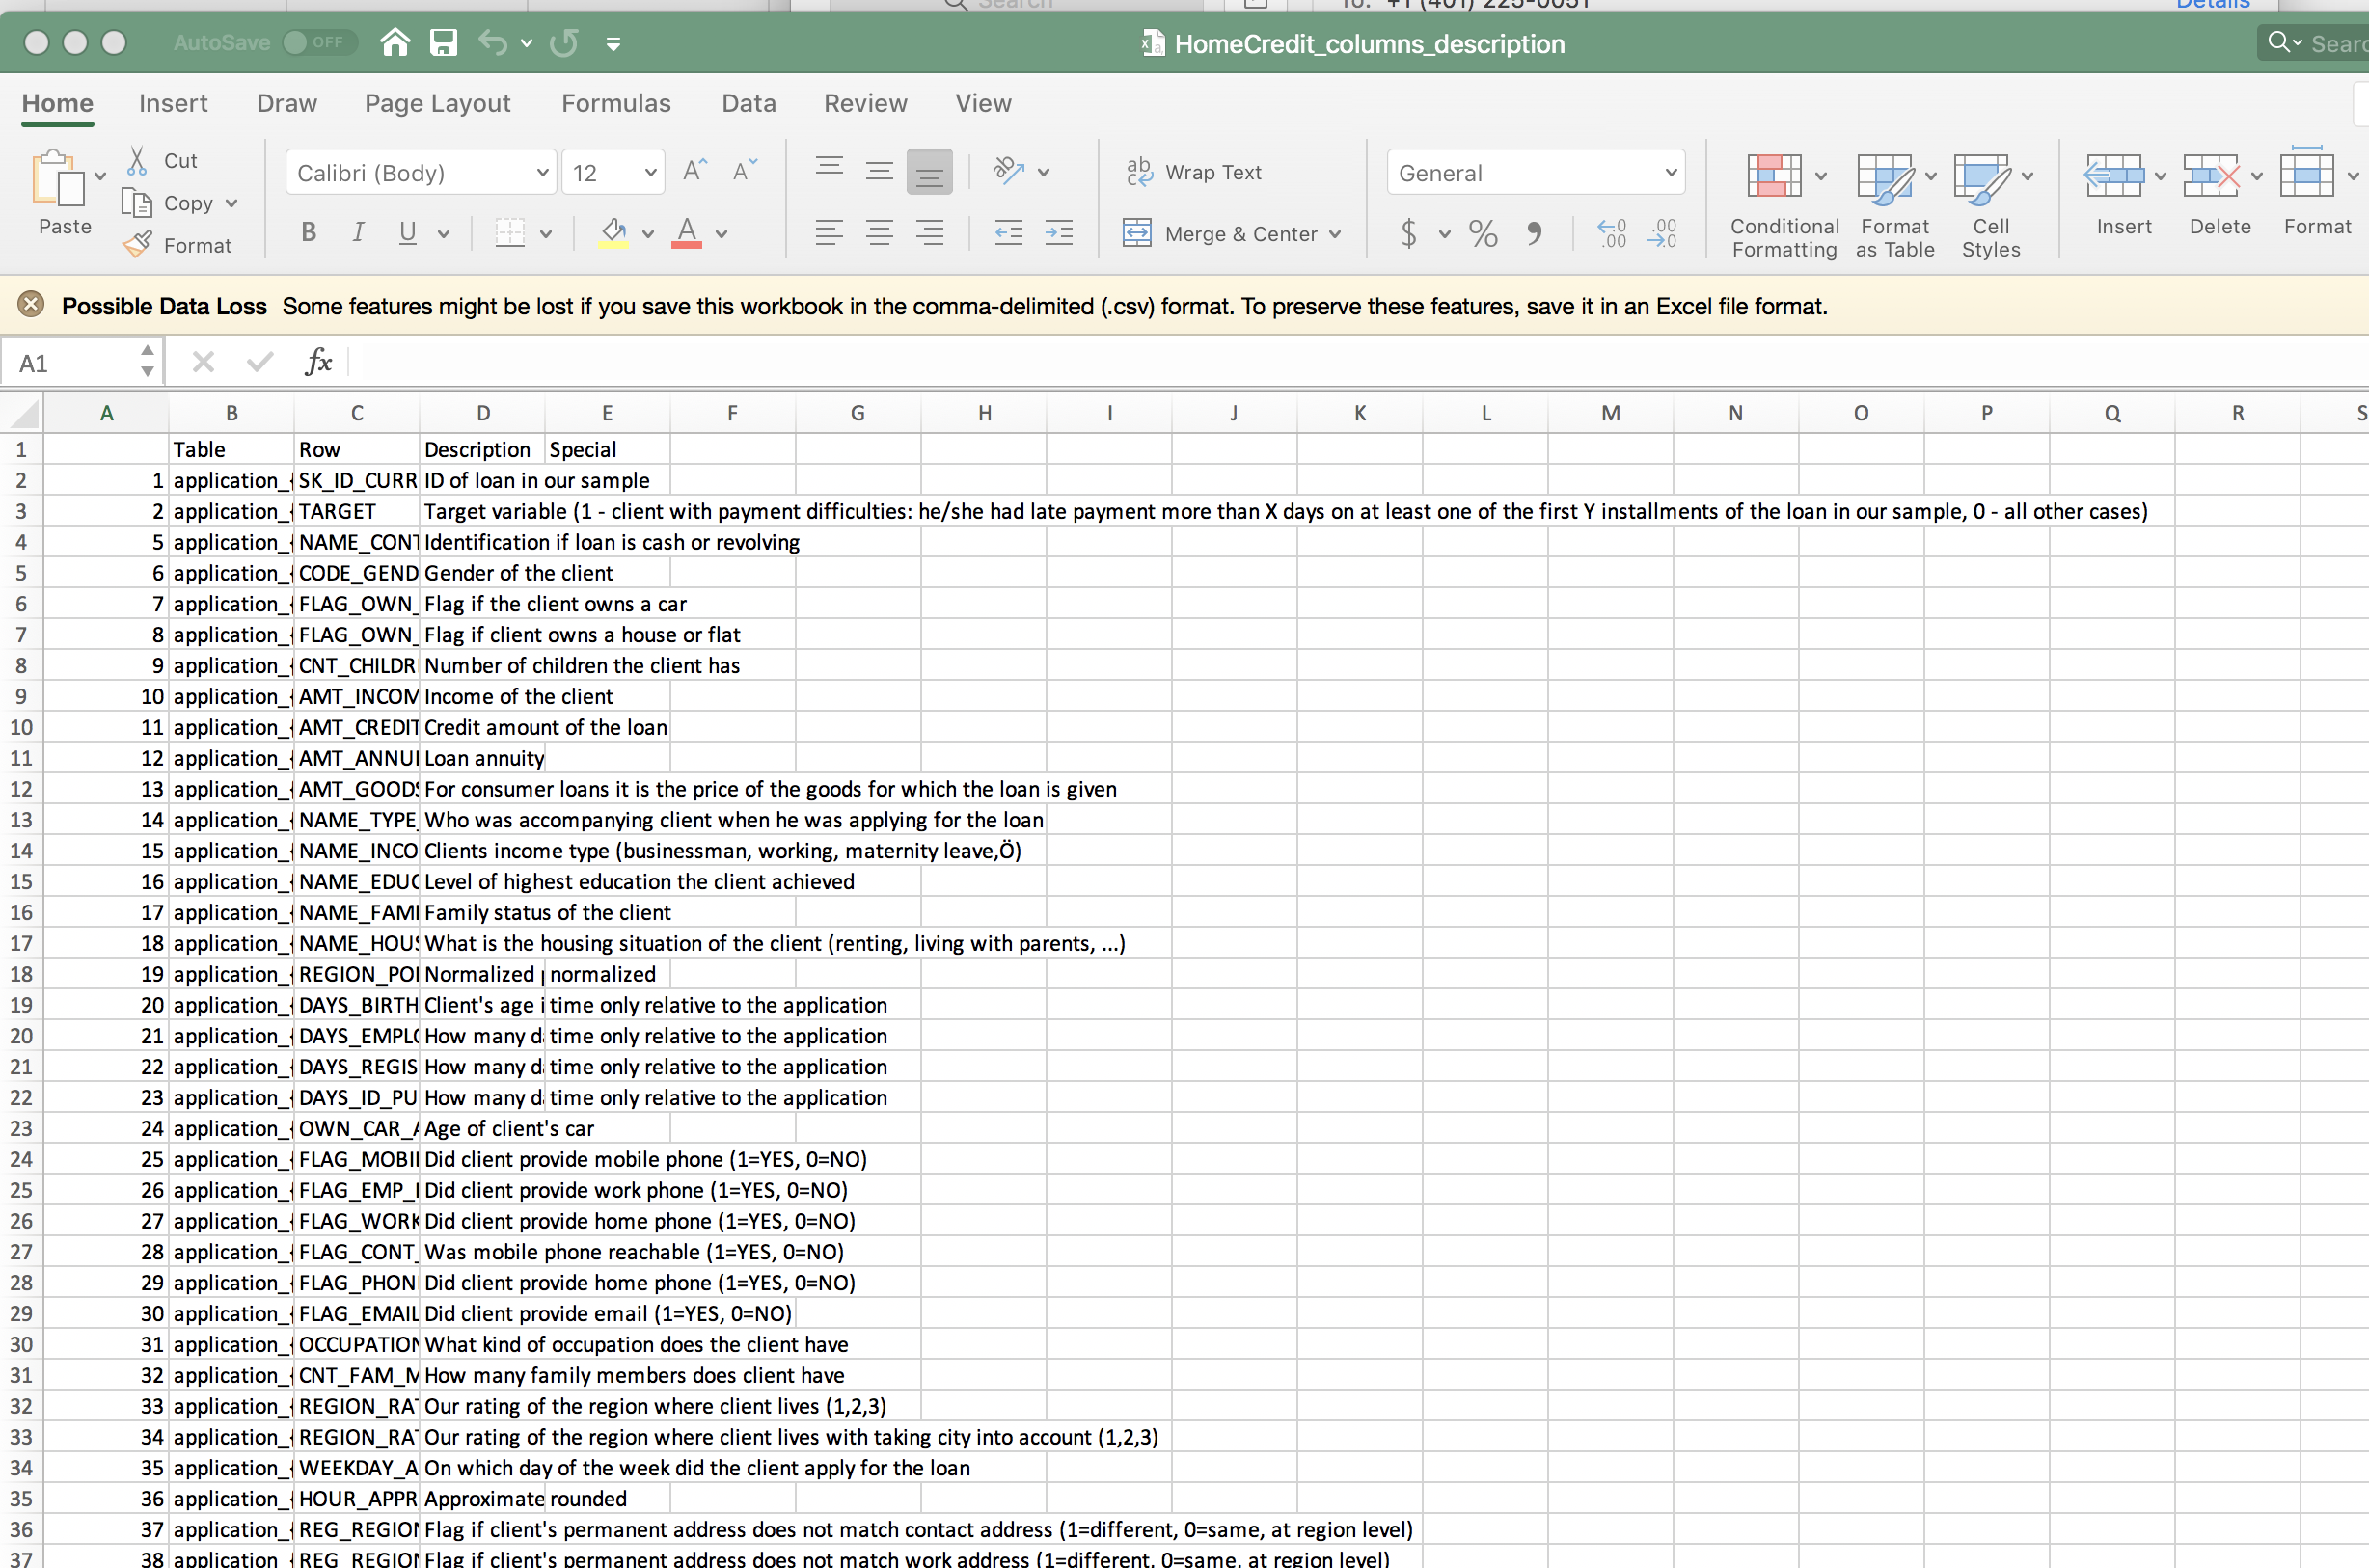

### Application train

In [149]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [150]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [151]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 36.7 s, sys: 7.57 s, total: 44.3 s
Wall time: 44.4 s


In [152]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application train

In [153]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [154]:
datasets["application_train"].describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [155]:
datasets["application_test"].describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [156]:
#datasets["application_train"].describe(include='all') #look at all categorical and numerical

## Missing data for application train

In [157]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


In [158]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


## Distribution of the target column 

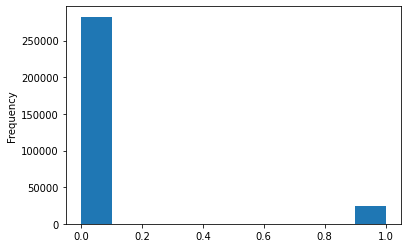

In [159]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

## Correlation with  the target column 

In [160]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [161]:
train_data = datasets['application_train']
test_data = datasets['application_test']

## Correlation Heatmap

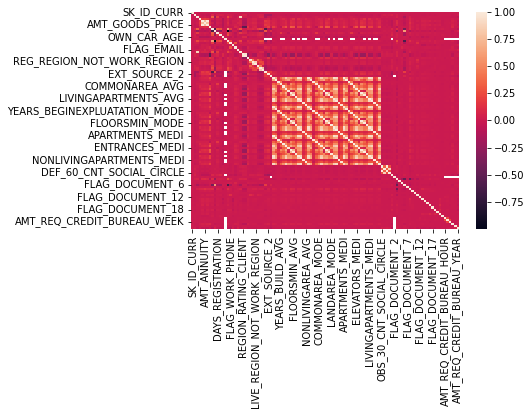

In [162]:
dataplot = sns.heatmap(train_data.corr())
plt.show()

## Applicants Gender Distribution

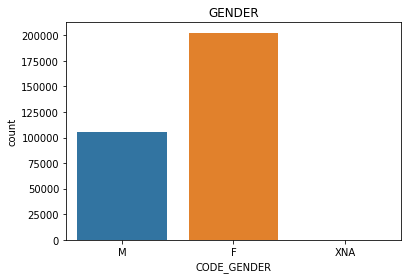

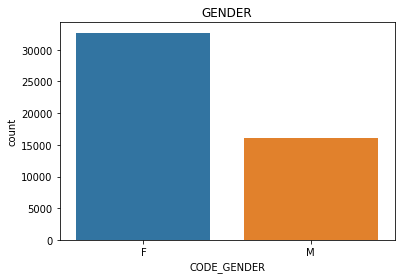

In [163]:
sns.countplot(data=train_data, x='CODE_GENDER')
plt.title('GENDER')
plt.show()

sns.countplot(data=test_data, x='CODE_GENDER')
plt.title('GENDER')
plt.show()

## Applicants Age 

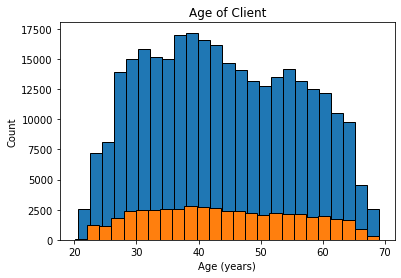

In [164]:
plt.hist(train_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

plt.hist(test_data['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

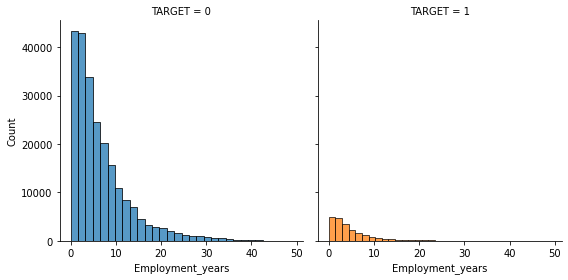

In [165]:
train_data['DAYS_EMPLOYED_ERROR'] = train_data['DAYS_EMPLOYED'] == 365243
test_data['DAYS_EMPLOYED_ERROR'] = test_data['DAYS_EMPLOYED'] == 365243

train_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

train_data['Employment_years'] = train_data['DAYS_EMPLOYED']/-365
figure = sns.FacetGrid(train_data, col='TARGET', hue='TARGET', height=4)
figure.map(sns.histplot, 'Employment_years', bins=30, kde=False)
plt.show()

## Applicants Contract Types

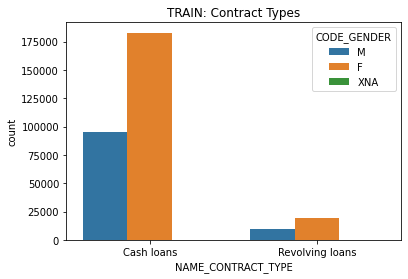

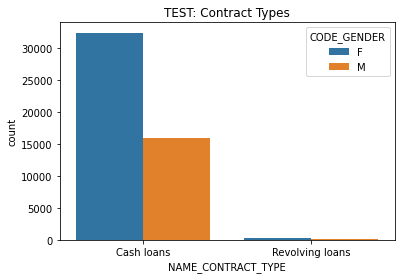

In [166]:
sns.countplot(data=train_data, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER')
plt.title('TRAIN: Contract Types')
plt.show()

sns.countplot(data=test_data, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER')
plt.title('TEST: Contract Types')
plt.show()

## Applicants Real Estate Owners

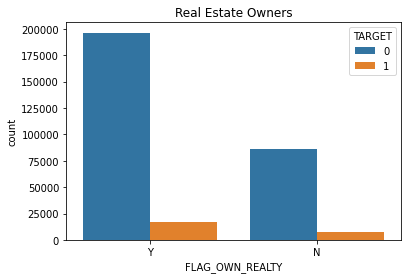

In [167]:
sns.countplot(data=train_data, x='FLAG_OWN_REALTY', hue='TARGET')
plt.title('Real Estate Owners')
plt.show()

## Applicants Income Sources

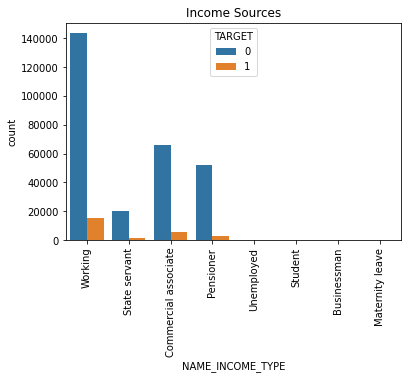

In [168]:
sns.countplot(data=train_data, x='NAME_INCOME_TYPE', hue='TARGET')
plt.title('Income Sources')
plt.xticks(rotation = 90)
plt.show()

## Applicants Occupation Types

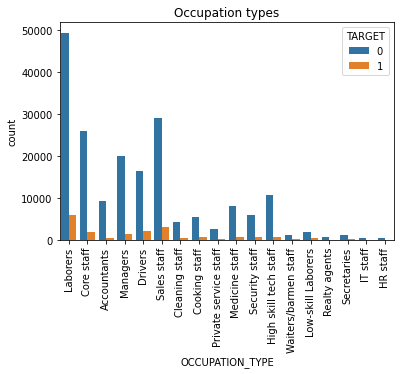

In [169]:
sns.countplot(data=train_data, x='OCCUPATION_TYPE', hue='TARGET')
plt.title('Occupation types')
plt.xticks(rotation = 90)
plt.show()

## Distribution of Occupation Types

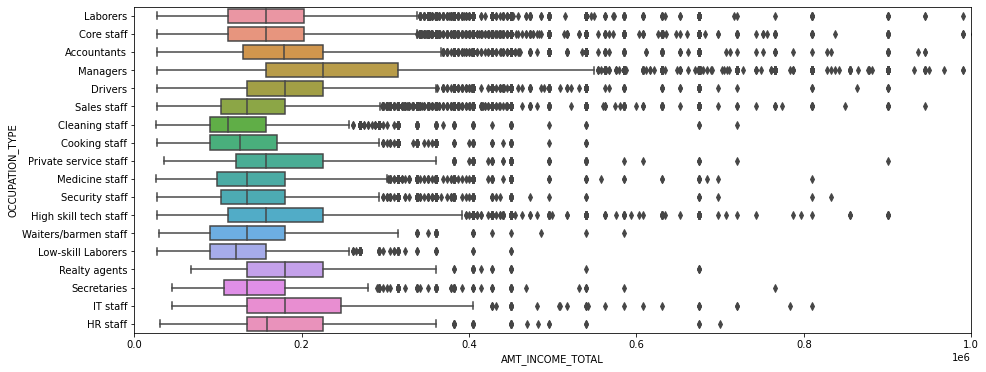

In [170]:
ig, ax = plt.subplots(figsize=(15, 6))
ax = sns.boxplot(y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL', orient='h', data=train_data)
plt.xlim([0, 1e6])
plt.show()

## Distribution of Amount AMT_CREDIT

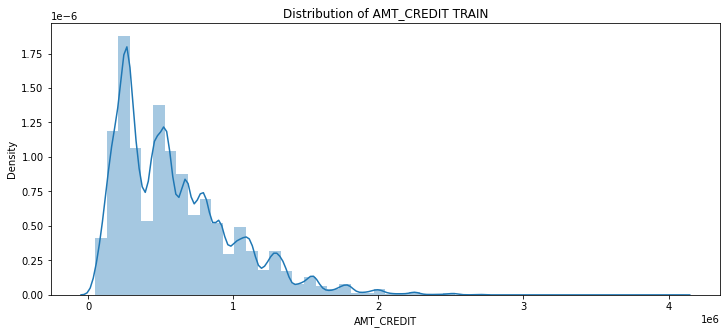

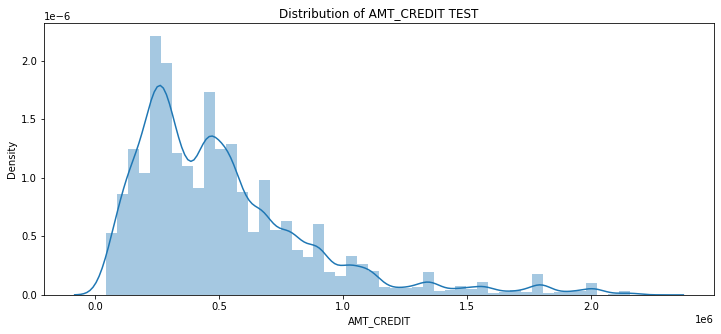

In [171]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT TRAIN")
ax = sns.distplot(train_data["AMT_CREDIT"])

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT TEST")
ax = sns.distplot(test_data["AMT_CREDIT"])

## Distribution of AMT_ANNUITY

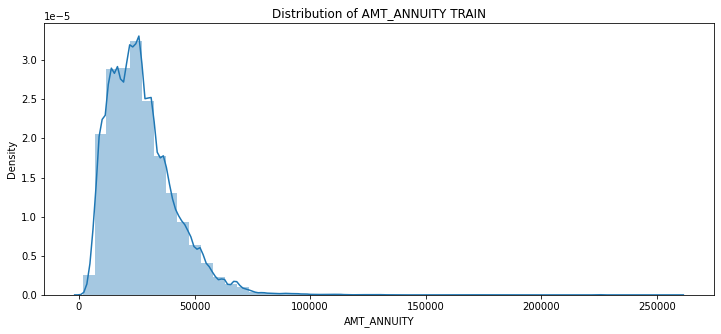

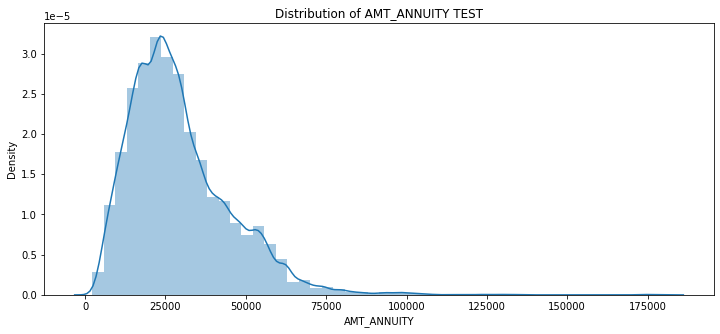

In [172]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY TRAIN")
ax = sns.distplot(train_data["AMT_ANNUITY"].dropna())

plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY TEST")
ax = sns.distplot(test_data["AMT_ANNUITY"].dropna())

## Distribution of Applicants Family Members Count

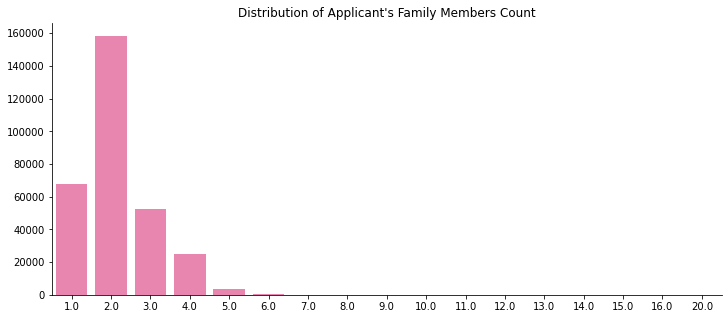

In [173]:
t = train_data["CNT_FAM_MEMBERS"].value_counts()
t1 = pd.DataFrame()
t1['x'] = t.index 
t1['y'] = t.values 

plt.figure(figsize=(12,5));
plt.title("Distribution of Applicant's Family Members Count");
ax = sns.barplot(data=t1, x="x", y="y", color="#f975ae");
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

ax.set_ylabel('');    
ax.set_xlabel('');

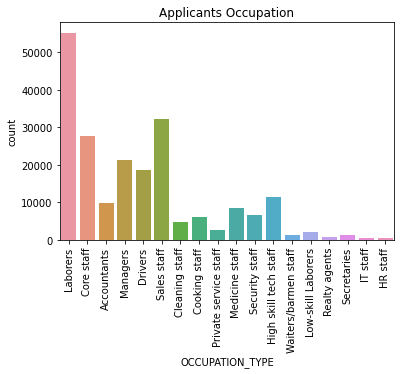

In [174]:
sns.countplot(x='OCCUPATION_TYPE', data=train_data);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

## Previous Application Data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


array([[<AxesSubplot:title={'center':'SK_ID_PREV'}>,
        <AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_APPLICATION'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>],
       [<AxesSubplot:title={'center':'AMT_DOWN_PAYMENT'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'NFLAG_LAST_APPL_IN_DAY'}>,
        <AxesSubplot:title={'center':'RATE_DOWN_PAYMENT'}>],
       [<AxesSubplot:title={'center':'RATE_INTEREST_PRIMARY'}>,
        <AxesSubplot:title={'center':'RATE_INTEREST_PRIVILEGED'}>,
        <AxesSubplot:title={'center':'DAYS_DECISION'}>,
        <AxesSubplot:title={'center':'SELLERPLACE_AREA'}>,
        <AxesSubplot:title={'center':'CNT_PAYMENT'}>],
       [<AxesSubplot:title={'center':'DAYS_FIRST_DRAWING'}>,
        <AxesSubplot:title={'center':'DAYS_FIRST_DUE'}>,


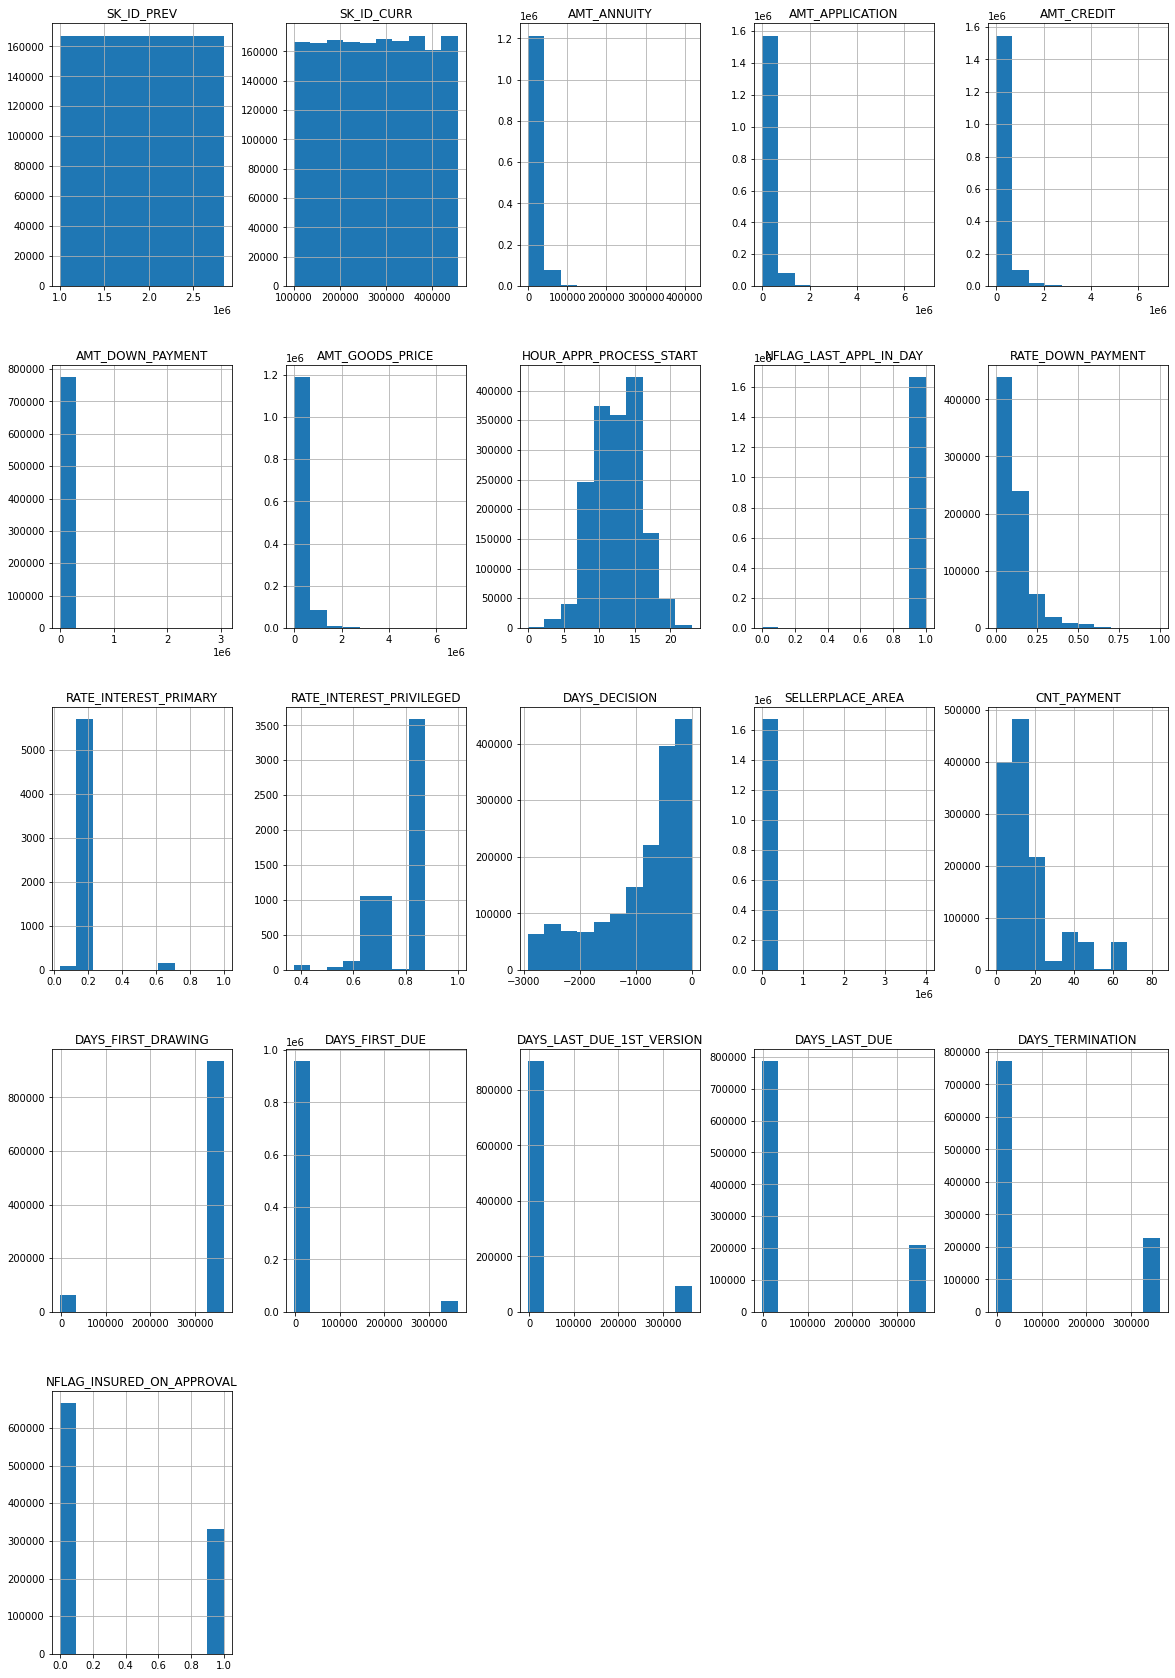

In [175]:
previous_application_data_frame = datasets['previous_application']
display(previous_application_data_frame.head(10))
display(previous_application_data_frame.describe())
previous_application_data_frame.hist(figsize=(20, 30))

## Missing values in Previous Application Data

In [176]:
percentage = (previous_application_data_frame.isnull().sum()/previous_application_data_frame.isnull().count()*100).sort_values(ascending = False).round(2)
missing_total = previous_application_data_frame.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percentage, missing_total], axis=1, keys=['Percent', 'Train Missing Count'])
missing_application_train_data.head(20)

,Percent,Train Missing Count
RATE_INTEREST_PRIVILEGED,99.64,1664263
RATE_INTEREST_PRIMARY,99.64,1664263
AMT_DOWN_PAYMENT,53.64,895844
RATE_DOWN_PAYMENT,53.64,895844
NAME_TYPE_SUITE,49.12,820405
NFLAG_INSURED_ON_APPROVAL,40.30,673065
DAYS_TERMINATION,40.30,673065
DAYS_LAST_DUE,40.30,673065
DAYS_LAST_DUE_1ST_VERSION,40.30,673065
DAYS_FIRST_DUE,40.30,673065


In [177]:
# Dropping columns with more missing data
previous_application_data_frame.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1, inplace=True)
correlation_matrix = previous_application_data_frame.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
updated_previous_application_data_frame = previous_application_data_frame.drop(previous_application_data_frame[columns_to_drop], axis=1)
updated_previous_application_data_frame.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,0.0,SATURDAY,15,Y,1,...,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,NaN,THURSDAY,11,Y,1,...,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,NaN,TUESDAY,11,Y,1,...,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,NaN,MONDAY,7,Y,1,...,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,NaN,THURSDAY,9,Y,1,...,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


## POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


array([[<AxesSubplot:title={'center':'SK_ID_PREV'}>,
        <AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'MONTHS_BALANCE'}>],
       [<AxesSubplot:title={'center':'CNT_INSTALMENT'}>,
        <AxesSubplot:title={'center':'CNT_INSTALMENT_FUTURE'}>,
        <AxesSubplot:title={'center':'SK_DPD'}>],
       [<AxesSubplot:title={'center':'SK_DPD_DEF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

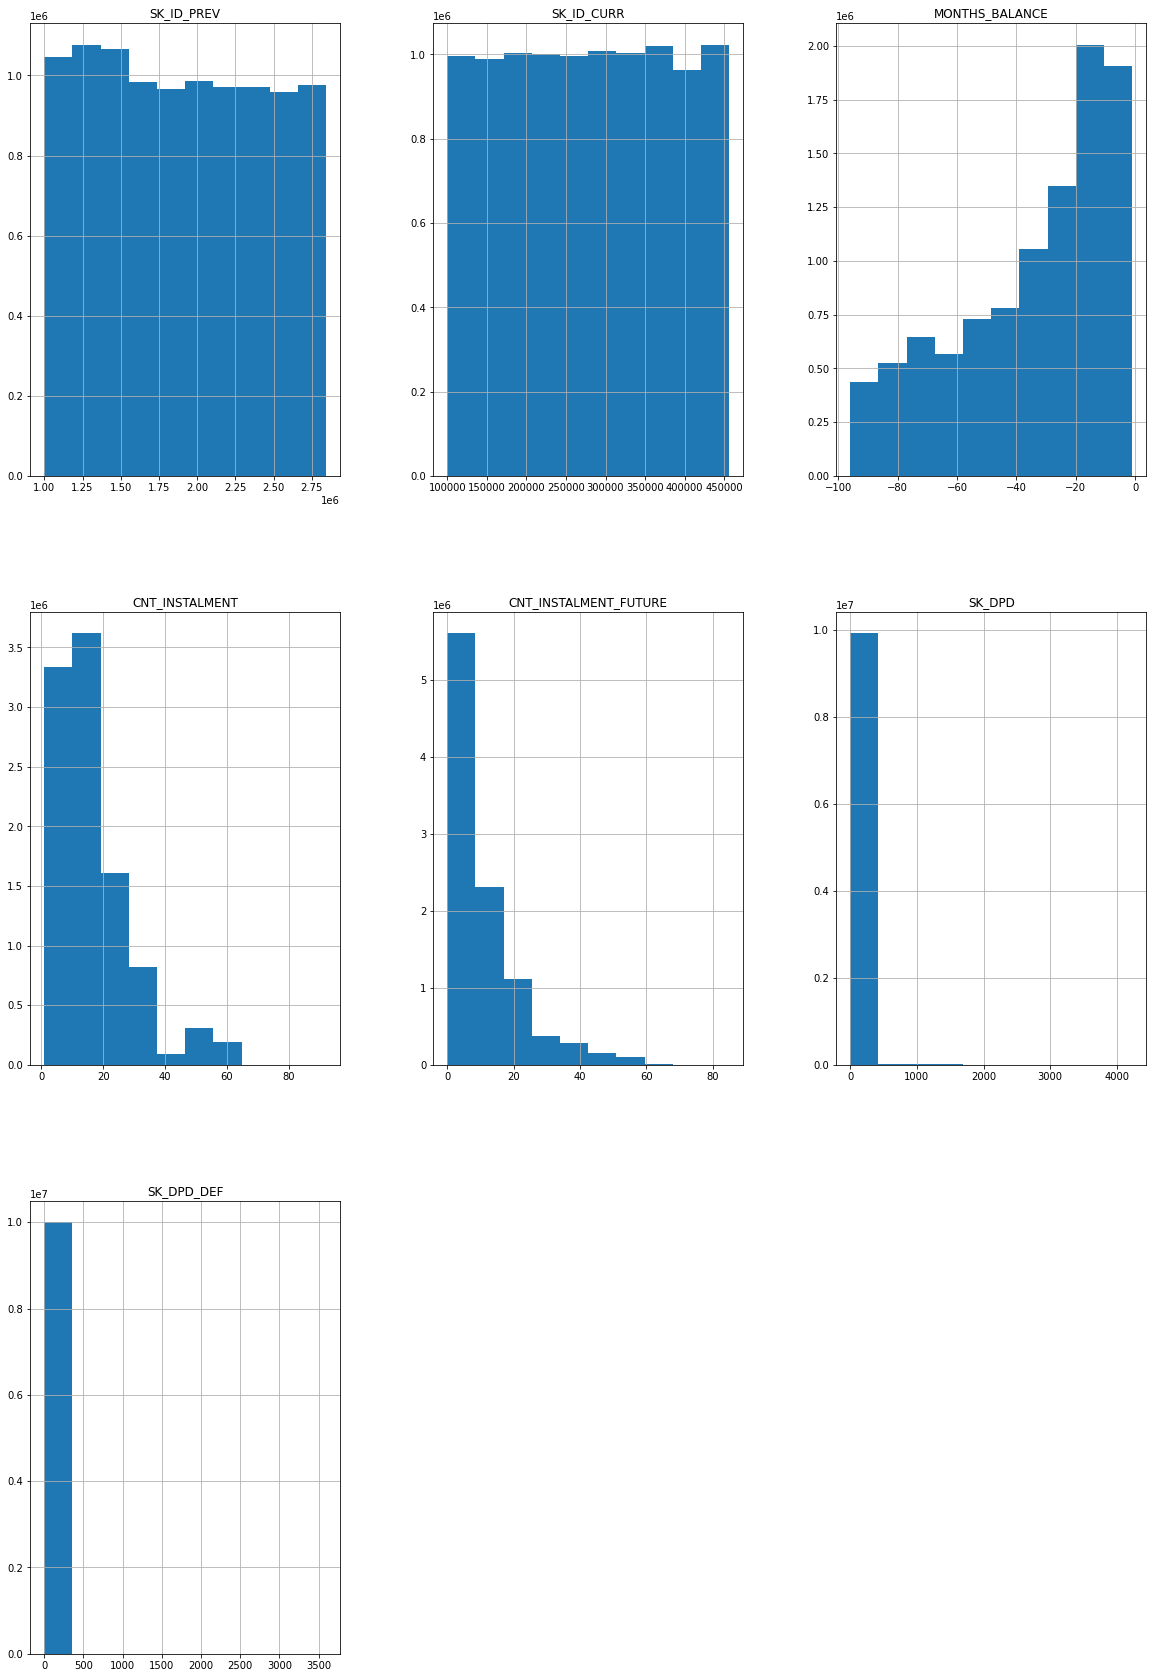

In [178]:
pos_cash_data_frame = datasets['POS_CASH_balance']
display(pos_cash_data_frame.head(10))
display(pos_cash_data_frame.describe())
pos_cash_data_frame.hist(figsize=(20, 30))

In [179]:
pos_cash_data_frame_0 = pos_cash_data_frame.loc[pos_cash_data_frame.groupby(['SK_ID_PREV','SK_ID_CURR'])['MONTHS_BALANCE'].idxmax()]   
pos_cash_data_frame_0.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45995,1000001,158271,-8,2.0,0.0,Completed,0,0
2792302,1000002,101962,-50,4.0,0.0,Completed,0,0
7085917,1000003,252457,-1,12.0,9.0,Active,0,0
4078063,1000004,260094,-22,7.0,0.0,Completed,0,0
7852623,1000005,176456,-46,10.0,0.0,Completed,0,0


In [180]:
pos_cash_data_frame_0['NAME_CONTRACT_STATUS'].value_counts()

Completed                698421
Active                   236149
Signed                     1272
Returned to the store       304
Demand                      102
Approved                     58
Amortized debt               17
Canceled                      2
Name: NAME_CONTRACT_STATUS, dtype: int64

<AxesSubplot:xlabel='count', ylabel='NAME_CONTRACT_STATUS'>

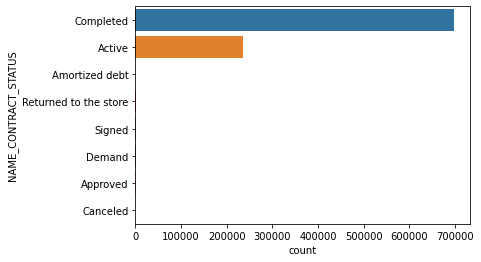

In [181]:
sns.countplot(y='NAME_CONTRACT_STATUS', data=pos_cash_data_frame_0)

## Bureau Data

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'SK_ID_BUREAU'}>,
        <AxesSubplot:title={'center':'DAYS_CREDIT'}>,
        <AxesSubplot:title={'center':'CREDIT_DAY_OVERDUE'}>],
       [<AxesSubplot:title={'center':'DAYS_CREDIT_ENDDATE'}>,
        <AxesSubplot:title={'center':'DAYS_ENDDATE_FACT'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT_MAX_OVERDUE'}>,
        <AxesSubplot:title={'center':'CNT_CREDIT_PROLONG'}>],
       [<AxesSubplot:title={'center':'AMT_CREDIT_SUM'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT_SUM_DEBT'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT_SUM_LIMIT'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT_SUM_OVERDUE'}>],
       [<AxesSubplot:title={'center':'DAYS_CREDIT_UPDATE'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

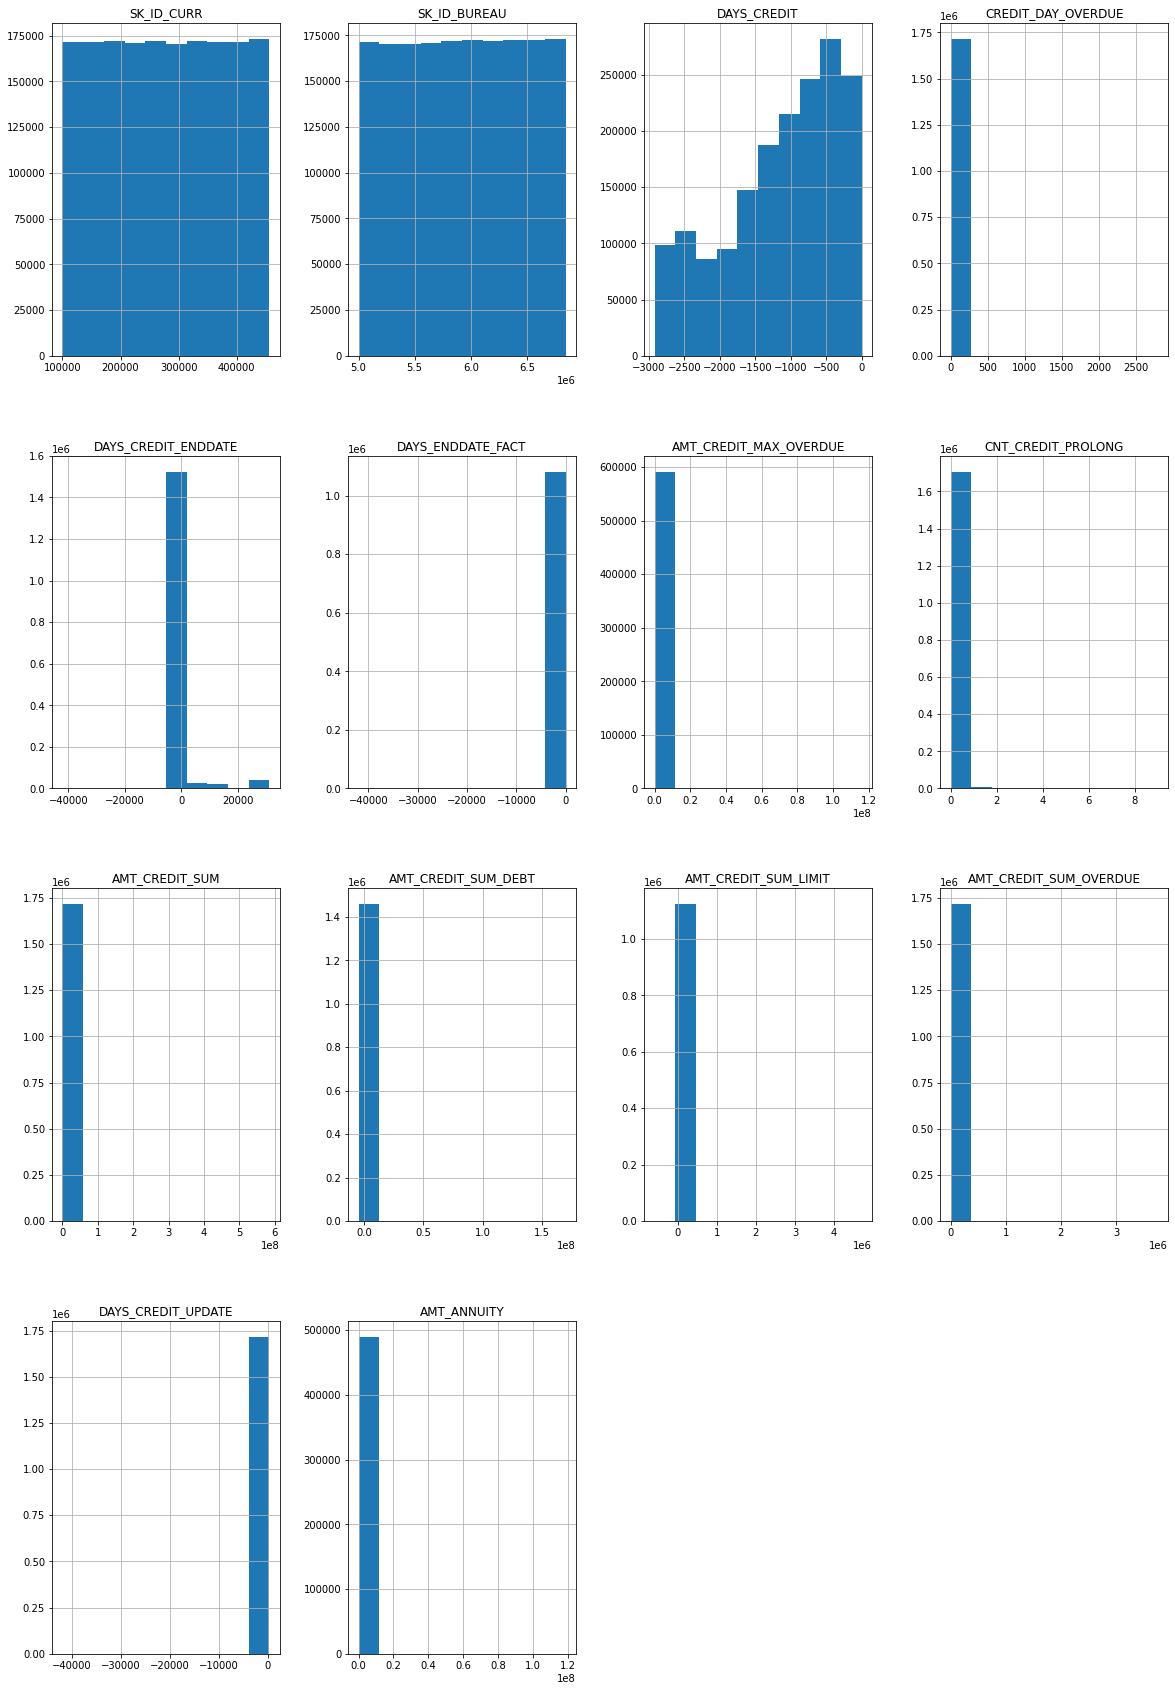

In [182]:
bureau_data_frame = datasets['bureau']
display(bureau_data_frame.head(10))
display(bureau_data_frame.describe())
bureau_data_frame.hist(figsize=(20, 30))

## Credit Card Balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


array([[<AxesSubplot:title={'center':'SK_ID_PREV'}>,
        <AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'MONTHS_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT_LIMIT_ACTUAL'}>],
       [<AxesSubplot:title={'center':'AMT_DRAWINGS_ATM_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_OTHER_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_POS_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_INST_MIN_REGULARITY'}>],
       [<AxesSubplot:title={'center':'AMT_PAYMENT_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_PAYMENT_TOTAL_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_RECEIVABLE_PRINCIPAL'}>,
        <AxesSubplot:title={'center':'AMT_RECIVABLE'}>,
        <AxesSubplot:title={'center':'AMT_TOTAL_RECEIVABLE'}>],
       [<AxesSubplot:title={'center':'CNT_DRAWINGS_ATM_CURRENT'}>,

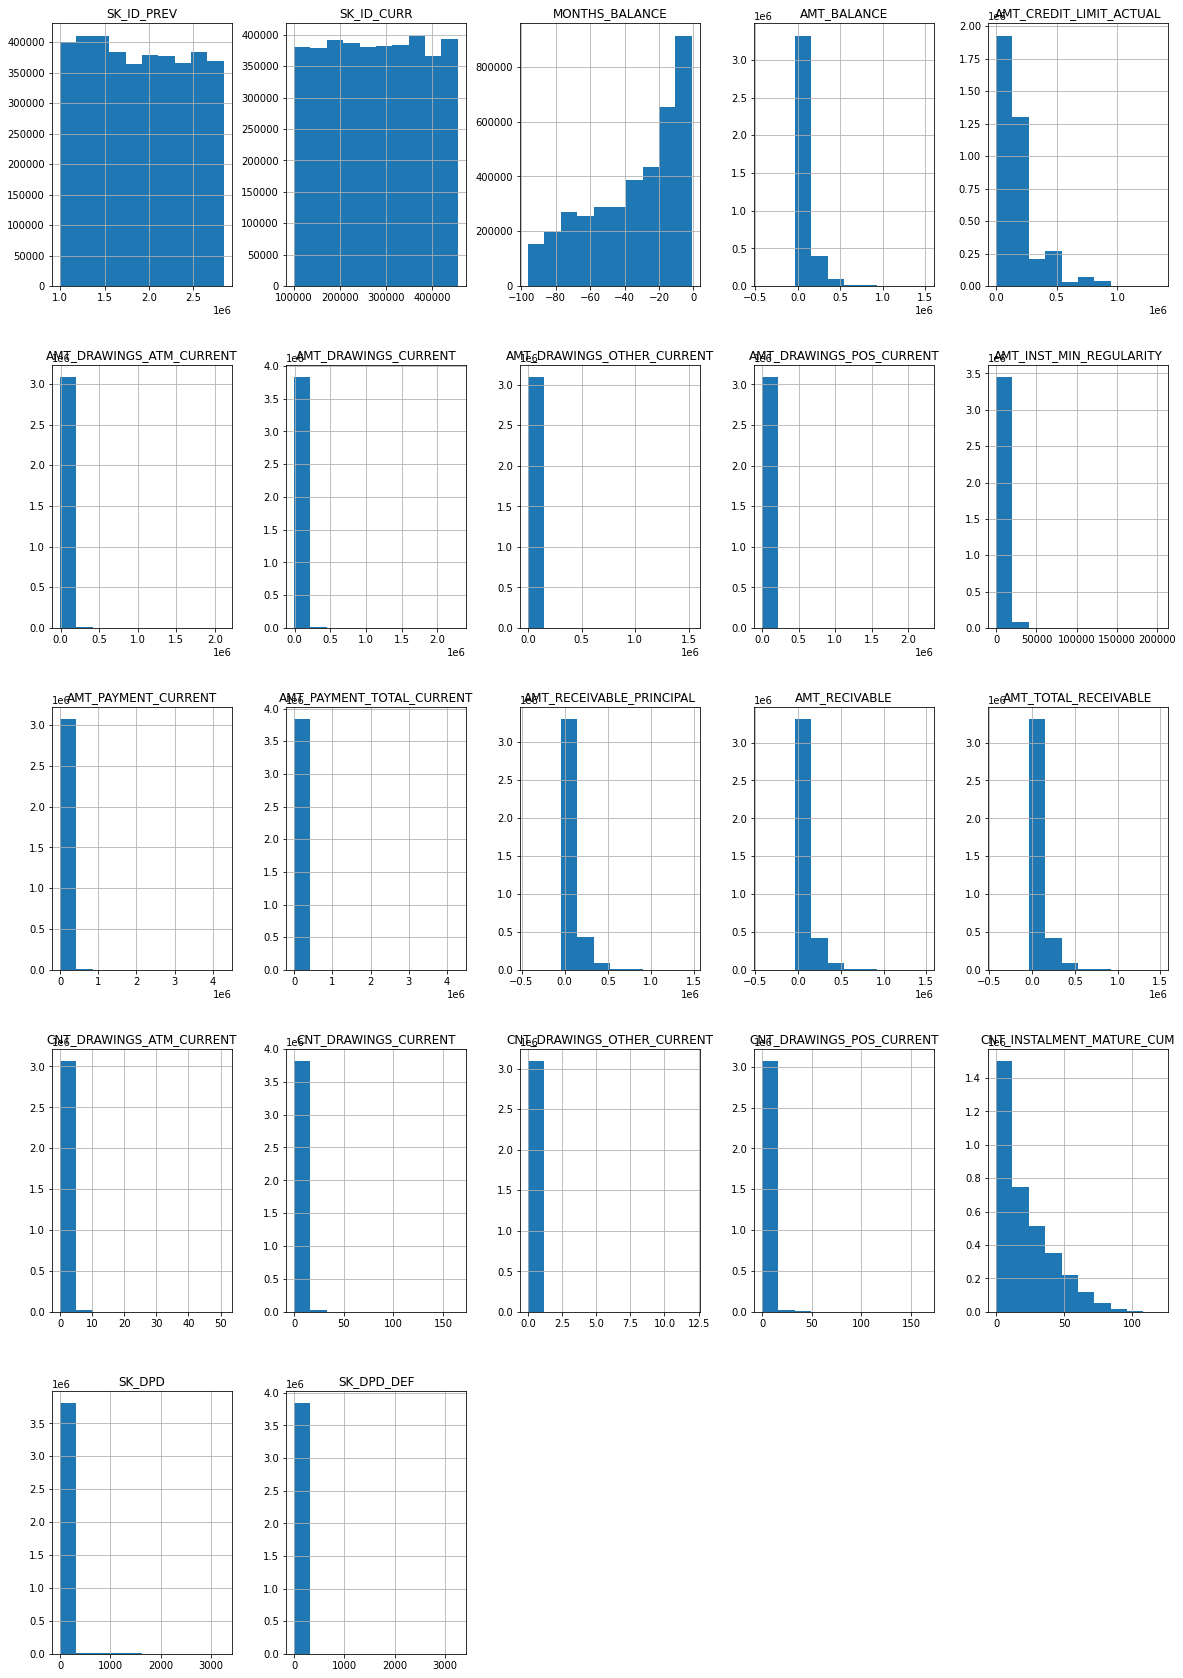

In [183]:
credit_card_data_frame = datasets['credit_card_balance']
display(credit_card_data_frame.head(10))
display(credit_card_data_frame.describe())
credit_card_data_frame.hist(figsize=(20, 30))

## Installments Payments

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


array([[<AxesSubplot:title={'center':'SK_ID_PREV'}>,
        <AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'MONTHS_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT_LIMIT_ACTUAL'}>],
       [<AxesSubplot:title={'center':'AMT_DRAWINGS_ATM_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_OTHER_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_POS_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_INST_MIN_REGULARITY'}>],
       [<AxesSubplot:title={'center':'AMT_PAYMENT_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_PAYMENT_TOTAL_CURRENT'}>,
        <AxesSubplot:title={'center':'AMT_RECEIVABLE_PRINCIPAL'}>,
        <AxesSubplot:title={'center':'AMT_RECIVABLE'}>,
        <AxesSubplot:title={'center':'AMT_TOTAL_RECEIVABLE'}>],
       [<AxesSubplot:title={'center':'CNT_DRAWINGS_ATM_CURRENT'}>,

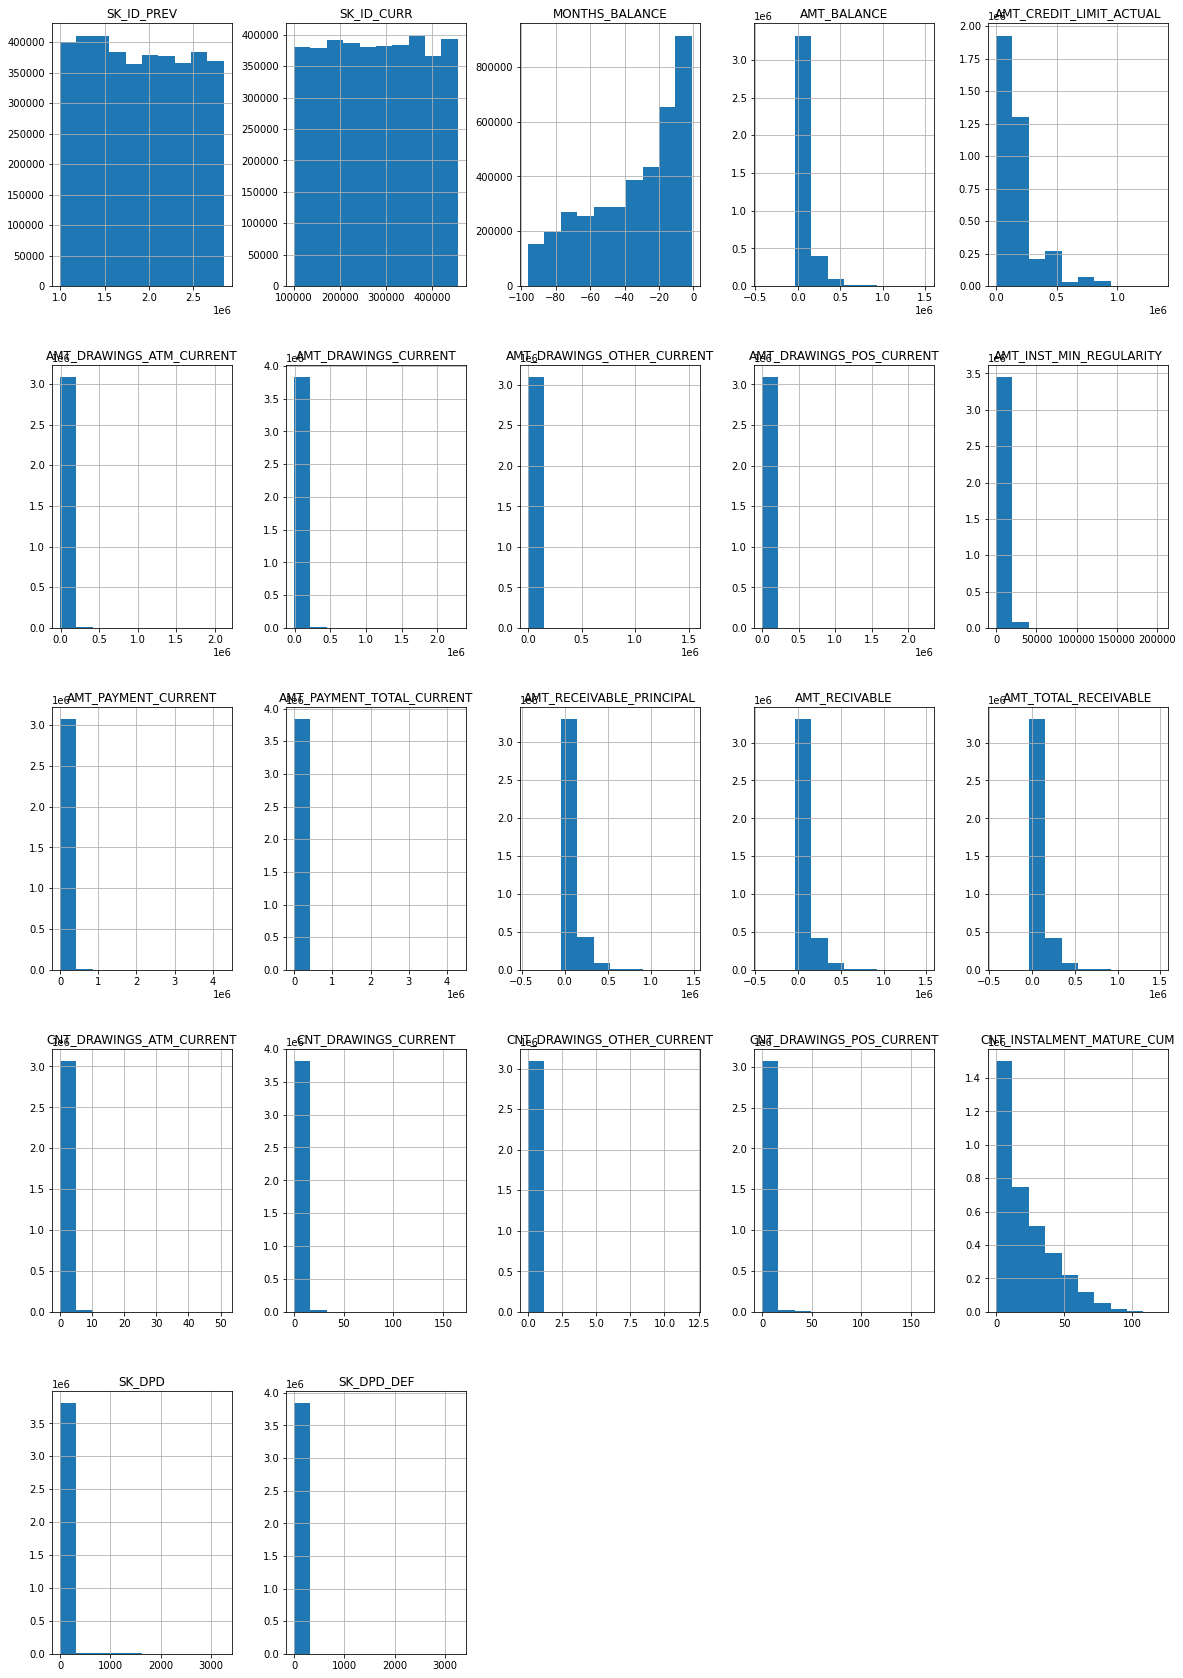

In [184]:
installments_data_frame = datasets['installments_payments']
display(credit_card_data_frame.head(10))
display(credit_card_data_frame.describe())
credit_card_data_frame.hist(figsize=(20, 30))

# Feature Engineering

In [185]:
ds_names = ('bureau_final',
            'credit_card_balance_final',
            'installments_payments_final',
            'previous_application_final',
            'POS_CASH_balance_final')

final_data = dict()

## Excess Loan

In [186]:
train_data['EXCESS_LOAN'] = train_data['AMT_CREDIT'] - train_data['AMT_GOODS_PRICE']
train_data['EXCESS_LOAN'].mask(train_data['EXCESS_LOAN'] < 0, 0, inplace=True)

## Flag Document Counts

In [187]:
train_documents = ['SK_ID_CURR']
for c in train_data.columns:
    if c[0:8] == 'FLAG_DOC':
        train_documents.append(c)
        
train_flags = train_data[train_documents]
train_count = train_flags.melt(id_vars = 'SK_ID_CURR', var_name = 'Document', value_name = 'FLAG_DOCS_SUBMITTED').groupby('SK_ID_CURR').sum()
train_count.head()

,FLAG_DOCS_SUBMITTED
SK_ID_CURR,
100002,1
100003,1
100004,0
100006,1
100007,1


## Income Per Family

In [188]:
train_data_final = pd.merge(train_data, train_count, 'left', 'SK_ID_CURR')
train_data_final['INCOME_PER_FAMILY_MEMBER'] = train_data_final['AMT_INCOME_TOTAL']/train_data_final['CNT_FAM_MEMBERS']
train_data_final['DEBT_TO_INCOME'] = train_data_final['AMT_ANNUITY'] / (train_data_final['AMT_INCOME_TOTAL'] / 12)

In [189]:
train_data_final.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ERROR,Employment_years,EXCESS_LOAN,FLAG_DOCS_SUBMITTED,INCOME_PER_FAMILY_MEMBER,DEBT_TO_INCOME
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0.0,0.0,0.0,1.0,False,1.745205,55597.5,1,202500.0000,1.463733
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,False,3.254795,164002.5,1,135000.0000,1.586600
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0.0,0.0,0.0,0.0,False,0.616438,0.0,0,67500.0000,1.200000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,NaN,NaN,NaN,NaN,False,8.326027,15682.5,1,67500.0000,2.638800
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0.0,0.0,0.0,0.0,False,8.323288,0.0,1,121500.0000,2.159556
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0.0,0.0,1.0,1.0,False,4.350685,35995.5,1,49500.0000,3.335455
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0.0,1.0,1.0,2.0,False,8.575342,165726.0,2,57000.0000,2.898316
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,False,1.230137,0.0,1,180000.0000,1.402500
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,1.0,True,NaN,106110.0,1,56250.0000,3.608160
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,NaN,NaN,NaN,NaN,False,5.531507,0.0,0,135000.0000,1.800000


## Adding to test data

In [190]:
test_data['EXCESS_LOAN'] = test_data['AMT_CREDIT'] - test_data['AMT_GOODS_PRICE']
test_data['EXCESS_LOAN'].mask(test_data['EXCESS_LOAN']<0, 0, inplace=True)
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ERROR,EXCESS_LOAN
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,118800.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False,42768.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,4.0,False,33264.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0


In [191]:
test_documents = ['SK_ID_CURR']
for c in test_data.columns:
    if c[0:8] == 'FLAG_DOC':
        test_documents.append(c)
        
test_flags = test_data[test_documents]
test_count = test_flags.melt(id_vars = 'SK_ID_CURR', var_name = 'Document', value_name = "FLAG_DOCS_SUBMITTED").groupby('SK_ID_CURR').sum()
test_count.head()

,FLAG_DOCS_SUBMITTED
SK_ID_CURR,
100001,1
100005,1
100013,1
100028,1
100038,1


In [192]:
test_data_final = pd.merge(test_data, test_flags, 'left', 'SK_ID_CURR')
test_data_final['INCOME_PER_FAMILY_MEMBER'] = test_data_final['AMT_INCOME_TOTAL']/test_data_final['CNT_FAM_MEMBERS']
test_data_final['DEBT_TO_INCOME'] = test_data_final['AMT_ANNUITY'] / (test_data_final['AMT_INCOME_TOTAL'] / 12)

In [193]:
test_data_final.head(15)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_14_y,FLAG_DOCUMENT_15_y,FLAG_DOCUMENT_16_y,FLAG_DOCUMENT_17_y,FLAG_DOCUMENT_18_y,FLAG_DOCUMENT_19_y,FLAG_DOCUMENT_20_y,FLAG_DOCUMENT_21_y,INCOME_PER_FAMILY_MEMBER,DEBT_TO_INCOME
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,0,0,0,67500.0,1.827600
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0,0,0,0,49500.0,2.105455
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0,0,0,0,101250.0,4.134933
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0,0,0,0,78750.0,1.867371
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0,0,0,0,60000.0,2.137800
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0,0,0,0,135000.0,1.537800
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0,0,0,0,45000.0,1.474500
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0,0,0,0,166500.0,1.024865
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0,0,0,0,157500.0,1.103143
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0,0,0,0,54000.0,0.395333


## One hot encoding

In [194]:
pos_cash_status = pos_cash_data_frame_0[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS']]
pos_cash_status.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS
45995,1000001,158271,Completed
2792302,1000002,101962,Completed
7085917,1000003,252457,Active
4078063,1000004,260094,Completed
7852623,1000005,176456,Completed


In [195]:
dummies = pd.get_dummies(pos_cash_status['NAME_CONTRACT_STATUS'])
dummies.head()

,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
45995,0,0,0,0,1,0,0,0
2792302,0,0,0,0,1,0,0,0
7085917,1,0,0,0,0,0,0,0
4078063,0,0,0,0,1,0,0,0
7852623,0,0,0,0,1,0,0,0


In [196]:
pos_cash_status = pd.concat([pos_cash_status, dummies] , axis=1, sort=False)
pos_cash_status.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
45995,1000001,158271,Completed,0,0,0,0,1,0,0,0
2792302,1000002,101962,Completed,0,0,0,0,1,0,0,0
7085917,1000003,252457,Active,1,0,0,0,0,0,0,0
4078063,1000004,260094,Completed,0,0,0,0,1,0,0,0
7852623,1000005,176456,Completed,0,0,0,0,1,0,0,0


In [197]:
agg_data_frame = pos_cash_data_frame.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg({
    'SK_ID_PREV':['size'],
    'CNT_INSTALMENT_FUTURE':['min'],
    'CNT_INSTALMENT':['max'] 
})

agg_data_frame.columns = agg_data_frame.columns.droplevel()
agg_data_frame.reset_index(inplace=True)
agg_data_frame.columns=['SK_ID_CURR','SK_ID_PREV','Count','Remaining_repays','Initial_term']
display(agg_data_frame.head())

,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term
0,100001,1369693,5,0.0,4.0
1,100001,1851984,4,0.0,4.0
2,100002,1038818,19,6.0,24.0
3,100003,1810518,8,0.0,12.0
4,100003,2396755,12,1.0,12.0


In [198]:
merged_data_frame = pd.merge(agg_data_frame, pos_cash_status, how='left')
merged_data_frame.head()

,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term,NAME_CONTRACT_STATUS,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
0,100001,1369693,5,0.0,4.0,Completed,0,0,0,0,1,0,0,0
1,100001,1851984,4,0.0,4.0,Completed,0,0,0,0,1,0,0,0
2,100002,1038818,19,6.0,24.0,Active,1,0,0,0,0,0,0,0
3,100003,1810518,8,0.0,12.0,Completed,0,0,0,0,1,0,0,0
4,100003,2396755,12,1.0,12.0,Active,1,0,0,0,0,0,0,0


In [199]:
merged_agg_data_frame = merged_data_frame.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV':['size'],
    'Remaining_repays':['sum'],
    'Initial_term':  ['min','max'],
    'Active':        ['sum'],
    'Amortized debt':['sum'],
    'Approved':      ['sum'],
    'Canceled':      ['sum'],
    'Completed':     ['sum'],
    'Demand':        ['sum'],
    'Returned to the store':['sum'],
    'Signed':        ['sum']
})

merged_agg_data_frame.columns = merged_agg_data_frame.columns.droplevel()
merged_agg_data_frame.reset_index(inplace=True)
merged_agg_data_frame.columns=['SK_ID_CURR','Count','Total_Remaining_repays','Min_Initial_term','Max_Initial_term','Active','Amortized debt','Approved','Canceled','Completed','Demand','Returned to the store','Signed']
display(merged_agg_data_frame.head())

,SK_ID_CURR,Count,Total_Remaining_repays,Min_Initial_term,Max_Initial_term,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
0,100001,2,0.0,4.0,4.0,0,0,0,0,2,0,0,0
1,100002,1,6.0,24.0,24.0,1,0,0,0,0,0,0,0
2,100003,3,1.0,6.0,12.0,1,0,0,0,2,0,0,0
3,100004,1,0.0,4.0,4.0,0,0,0,0,1,0,0,0
4,100005,1,0.0,12.0,12.0,0,0,0,0,1,0,0,0


In [200]:
final_data['POS_CASH_balance_final'] = merged_agg_data_frame

In [201]:
categorical_features = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS']
updated_prev_app_categorical = updated_previous_application_data_frame[categorical_features]

simple_imputed = SimpleImputer(fill_value='missing', strategy='constant').fit_transform(updated_prev_app_categorical) 

one_hot_encoded = OneHotEncoder().fit(simple_imputed)
categorical_data_frame = pd.DataFrame(one_hot_encoded.transform(simple_imputed).toarray(
            ), index=updated_prev_app_categorical.index, columns=list(one_hot_encoded.get_feature_names(categorical_features)))

categorical_data_frame.columns=['Cashloans', 'Consumerloans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer']
categorical_data_frame.head()

,Cashloans,Consumerloans,Revolvingloans,XNA,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Approved,Canceled,Refused,Unusedoffer
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Aggregation

In [202]:
updated_previous_application_data_frame = pd.concat([updated_previous_application_data_frame, categorical_data_frame], axis=1)
merged_agg_data_frame = updated_previous_application_data_frame.groupby(by='SK_ID_CURR').agg({
 'Cashloans'     : ['sum'],
 'Consumerloans' : ['sum'],
 'Revolvingloans': ['sum'],
 'XNA'            : ['sum'],
 'FRIDAY'         : ['sum'],
 'MONDAY'         : ['sum'],
 'SATURDAY'       : ['sum'],
 'SUNDAY'         : ['sum'],
 'THURSDAY'       : ['sum'],
 'TUESDAY'        : ['sum'],
 'WEDNESDAY'      : ['sum'],
 'Approved'       : ['sum'],
 'Canceled'       : ['sum'],
 'Refused'        : ['sum'],
 'Unusedoffer'   : ['sum'],
 'SK_ID_PREV'                 : ['size'],
 'AMT_ANNUITY'                : ['min','max','mean'],
 'AMT_APPLICATION'            : ['min','max','mean'],
 'DAYS_DECISION'              : ['min','max','mean'],
})

merged_agg_data_frame.columns = merged_agg_data_frame.columns.droplevel()
merged_agg_data_frame.reset_index(inplace=True)
merged_agg_data_frame.columns= ['SK_ID_CURR','Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean']
display(merged_agg_data_frame.head())

,SK_ID_CURR,Cash loans,Consumer loans,Revolvingloans,XNA,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,...,Total_records,Tot_AMT_ANNUITY_min,Tot_AMT_ANNUITY_max,Tot_AMT_ANNUITY_mean,Tot_AMT_APPLICATION_min,Tot_AMT_APPLICATION_max,Tot_AMT_APPLICATION_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean
0,100001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,-1740,-1740,-1740.0
1,100002,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,-606,-606,-606.0
2,100003,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,-2341,-746,-1305.0
3,100004,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,-815,-815,-815.0
4,100005,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,-757,-315,-536.0


In [203]:
final_data['previous_application_final'] = merged_agg_data_frame

## Late payments

In [204]:
bureau_balance_data_frame = datasets['bureau_balance']
no_of_months = bureau_balance_data_frame.groupby('SK_ID_BUREAU').count()['STATUS']
no_of_late_months = bureau_balance_data_frame[(bureau_balance_data_frame['STATUS'] != '0') & (bureau_balance_data_frame['STATUS'] != 'C') & (bureau_balance_data_frame['STATUS'] != 'X')].groupby('SK_ID_BUREAU').count()['STATUS']

status_data_frame = pd.merge(left = no_of_months, right = no_of_late_months, how = 'left', on = "SK_ID_BUREAU", suffixes = ('_tot', '_late'))
status_data_frame.fillna(0, inplace = True)
status_data_frame.head()

,STATUS_tot,STATUS_late
SK_ID_BUREAU,,
5001709,97,0.0
5001710,83,0.0
5001711,4,0.0
5001712,19,0.0
5001713,22,0.0


In [205]:
bureau_data_frame = datasets['bureau']
bureau_data_frame.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [206]:
credit_debt_data_frame = bureau_data_frame[bureau_data_frame['CREDIT_TYPE'] == 'Credit card']
credit_debt_data_frame.drop(credit_debt_data_frame.columns.difference(['SK_ID_CURR','CREDIT_TYPE', 'AMT_CREDIT_SUM_DEBT']), 1, inplace=True)
credit_debt_data_frame = credit_debt_data_frame.groupby('SK_ID_CURR').sum()
credit_debt_data_frame.rename({'SK_ID_CURR': 'SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT': 'CREDIT_CARD_DEBT'}, axis = 1, inplace = True)
credit_debt_data_frame.head()

,CREDIT_CARD_DEBT
SK_ID_CURR,
100002,0.0
100003,0.0
100005,0.0
100009,326628.0
100011,0.0


## Active Loans

In [207]:
active_data_frame = bureau_data_frame[bureau_data_frame['CREDIT_ACTIVE'] == 'Active']
active_data_frame.drop(active_data_frame.columns.difference(['SK_ID_CURR','CREDIT_ACTIVE']), 1, inplace=True)
active_data_frame = active_data_frame.groupby('SK_ID_CURR').count()
active_data_frame.rename({'SK_ID_CURR': 'SK_ID_CURR', 'CREDIT_ACTIVE': 'TOTAL_ACTIVE_LOANS'}, axis = 1, inplace = True)
active_data_frame.head()

,TOTAL_ACTIVE_LOANS
SK_ID_CURR,
100001,3
100002,2
100003,1
100005,2
100008,1


In [208]:
bureau_data_frame.drop(bureau_data_frame.columns.difference(['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'SK_ID_BUREAU']), 1, inplace=True)

merged_bureau_data_frame = pd.merge(bureau_data_frame, status_data_frame, 'left','SK_ID_BUREAU')
merged_bureau_data_frame.drop('SK_ID_BUREAU', inplace = True, axis = 1)
merged_bureau_data_frame = merged_bureau_data_frame.groupby('SK_ID_CURR').sum()

output_bureau = pd.merge(merged_bureau_data_frame, active_data_frame, 'left', 'SK_ID_CURR')
output_bureau = pd.merge(output_bureau, credit_debt_data_frame, 'left', 'SK_ID_CURR')

output_bureau['Percent_Late'] = output_bureau['STATUS_late'] / output_bureau['STATUS_tot']
output_bureau['PERCENT_CREDIT_CARD'] = output_bureau['CREDIT_CARD_DEBT'] / output_bureau['AMT_CREDIT_SUM_DEBT']
output_bureau.drop(['STATUS_tot', 'STATUS_late', 'CREDIT_CARD_DEBT'], axis = 1, inplace = True)

# Adding more details to heading
output_bureau.rename({'AMT_CREDIT_SUM_DEBT': 'TOTAL_DEBT', 'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_DEBT_OVERDUE', 'TOTAL_ACTIVE_LOANS': 'TOTAL_NUMBER_OF_ACTIVE_LOANS', 'Percent_Late': 'PERCENT_LATE'}, axis = 1, inplace = True)
output_bureau['PERCENT_CREDIT_CARD'] = output_bureau['PERCENT_CREDIT_CARD'].fillna(0)
output_bureau['TOTAL_NUMBER_OF_ACTIVE_LOANS'] = output_bureau['TOTAL_NUMBER_OF_ACTIVE_LOANS'].fillna(0)
output_bureau.head()

,TOTAL_DEBT,TOTAL_DEBT_OVERDUE,TOTAL_NUMBER_OF_ACTIVE_LOANS,PERCENT_LATE,PERCENT_CREDIT_CARD
SK_ID_CURR,,,,,
100001,596686.5,0.0,3.0,0.005814,0.0
100002,245781.0,0.0,2.0,0.245455,0.0
100003,0.0,0.0,1.0,NaN,0.0
100004,0.0,0.0,0.0,NaN,0.0
100005,568408.5,0.0,2.0,0.000000,0.0


In [209]:
final_data['bureau_final'] = output_bureau

In [210]:
installments_data_frame['installment_days_difference'] = installments_data_frame['DAYS_ENTRY_PAYMENT'] - installments_data_frame['DAYS_INSTALMENT']
installments_data_frame['installment_amount_difference'] = installments_data_frame['AMT_PAYMENT'] - installments_data_frame['AMT_INSTALMENT']
installments_data_frame.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,installment_days_difference,installment_amount_difference
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,-7.0,0.000
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0,0.000
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0,0.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,-8.0,0.000
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,17.0,-4.455


In [211]:
installments_agg_data_frame = installments_data_frame.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg({
    'installment_days_difference':['mean'],
    'installment_amount_difference':['mean']  
})

installments_agg_data_frame.columns = installments_agg_data_frame.columns.droplevel()
installments_agg_data_frame.reset_index(inplace=True)
installments_agg_data_frame.columns=['SK_ID_CURR','SK_ID_PREV','Avg_installment_days_difference', 'Avg_installment_amount_difference']
display(installments_agg_data_frame.head())

,SK_ID_CURR,SK_ID_PREV,Avg_installment_days_difference,Avg_installment_amount_difference
0,100001,1369693,-15.500000,0.0
1,100001,1851984,3.666667,0.0
2,100002,1038818,-20.421053,0.0
3,100003,1810518,-4.428571,0.0
4,100003,2396755,-6.750000,0.0


In [212]:
installments_output = installments_agg_data_frame.groupby('SK_ID_CURR').agg({
    'Avg_installment_days_difference':['mean'],
    'Avg_installment_amount_difference':['mean']
})

installments_output.columns = installments_output.columns.droplevel()
installments_output.reset_index(inplace=True)
installments_output.columns=['SK_ID_CURR','Avg_installment_days_difference', 'Avg_installment_amount_difference']
display(installments_output.head())

,SK_ID_CURR,Avg_installment_days_difference,Avg_installment_amount_difference
0,100001,-5.916667,0.0
1,100002,-20.421053,0.0
2,100003,-7.448413,0.0
3,100004,-7.666667,0.0
4,100005,-23.555556,0.0


In [213]:
final_data['installments_payments_final'] = installments_output

## Late Payment Percentage

In [214]:
no_of_months = credit_card_data_frame.groupby('SK_ID_PREV').count()['MONTHS_BALANCE']
no_of_late_months = credit_card_data_frame[(credit_card_data_frame['SK_DPD'] != 0)].groupby('SK_ID_PREV').count()['SK_DPD']
late_credit_data_frame = pd.merge(left = no_of_months, right = no_of_late_months, how = 'left', on = "SK_ID_PREV")
late_credit_data_frame.fillna(0, inplace = True)
late_credit_data_frame.head()

,MONTHS_BALANCE,SK_DPD
SK_ID_PREV,,
1000018,5,0.0
1000030,8,0.0
1000031,16,0.0
1000035,5,0.0
1000077,11,0.0


In [215]:
late_credit_data_frame['Payment_Pass_Due_Perc'] = late_credit_data_frame['SK_DPD'] / late_credit_data_frame['MONTHS_BALANCE']
late_credit_data_frame.head()

,MONTHS_BALANCE,SK_DPD,Payment_Pass_Due_Perc
SK_ID_PREV,,,
1000018,5,0.0,0.0
1000030,8,0.0,0.0
1000031,16,0.0,0.0
1000035,5,0.0,0.0
1000077,11,0.0,0.0


In [216]:
credit_agg_data_frame = credit_card_data_frame.groupby(['SK_ID_CURR','SK_ID_PREV']).agg({
    'AMT_BALANCE':['mean'],
    'AMT_CREDIT_LIMIT_ACTUAL':['mean'],
    'AMT_PAYMENT_TOTAL_CURRENT':['mean'],
})

credit_agg_data_frame.columns = credit_agg_data_frame.columns.droplevel()
credit_agg_data_frame.reset_index(inplace=True)
credit_agg_data_frame.columns=['SK_ID_CURR', 'SK_ID_PREV','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments']
display(credit_agg_data_frame.head())

,SK_ID_CURR,SK_ID_PREV,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments
0,100006,1489396,0.000000,270000.000000,0.000000
1,100011,1843384,54482.111149,164189.189189,4520.067568
2,100013,2038692,18159.919219,131718.750000,6817.172344
3,100021,2594025,0.000000,675000.000000,0.000000
4,100023,1499902,0.000000,135000.000000,0.000000


In [217]:
merged_credit_data_frame = pd.merge(credit_agg_data_frame, late_credit_data_frame, 'left','SK_ID_PREV')
dropped_credit_data_frame = merged_credit_data_frame.drop(columns=['MONTHS_BALANCE', 'SK_DPD'])
dropped_credit_data_frame.head()

,SK_ID_CURR,SK_ID_PREV,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,Payment_Pass_Due_Perc
0,100006,1489396,0.000000,270000.000000,0.000000,0.000000
1,100011,1843384,54482.111149,164189.189189,4520.067568,0.000000
2,100013,2038692,18159.919219,131718.750000,6817.172344,0.010417
3,100021,2594025,0.000000,675000.000000,0.000000,0.000000
4,100023,1499902,0.000000,135000.000000,0.000000,0.000000


In [218]:
credit_card_output = dropped_credit_data_frame.groupby('SK_ID_CURR').agg({
    'CC_Average_Monthly_Balance':['sum'],
    'CC_Average_Credit_Card_Limit':['mean'],
    'CC_Average_Monthly_Payments':['sum'],
    'Payment_Pass_Due_Perc': ['mean']
})

credit_card_output.columns = credit_card_output.columns.droplevel()
credit_card_output.reset_index(inplace=True)
credit_card_output.columns=['SK_ID_CURR','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments', 'CC_Average_percentage_pass_due']
display(credit_card_output.head())

,SK_ID_CURR,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,CC_Average_percentage_pass_due
0,100006,0.000000,270000.000000,0.000000,0.000000
1,100011,54482.111149,164189.189189,4520.067568,0.000000
2,100013,18159.919219,131718.750000,6817.172344,0.010417
3,100021,0.000000,675000.000000,0.000000,0.000000
4,100023,0.000000,135000.000000,0.000000,0.000000


## Final Data after Feature Engineering

In [219]:
final_data['credit_card_balance_final'] = credit_card_output

In [220]:
for key in final_data.keys():
    print(key, final_data[key].shape)

POS_CASH_balance_final (337252, 13)
previous_application_final (338857, 26)
bureau_final (305811, 5)
installments_payments_final (339587, 3)
credit_card_balance_final (103558, 5)


In [221]:
import pickle 
with open('final_data.pickle', 'wb') as f:
    pickle.dump(final_data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [222]:
import pickle 
with open('final_data.pickle', 'rb') as f:
    final_data = pickle.load(f)

## Highly corelated features

In [223]:
corr_values = train_data.corr()['TARGET'].sort_values()
features_count = 20

In [224]:
selected_features = list(corr_values.tail(features_count // 2 + 1).index) + list(corr_values.head(features_count // 2).index)
selected_features.remove('TARGET')
selected_features.remove('Employment_years')

categorical_features = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

selected_features += categorical_features
print("Features:", selected_features)

Features: ['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED_ERROR', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE']


In [225]:
from sklearn.model_selection import train_test_split

if False: # Change it to True if want to use only the application data
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test = datasets["application_test"][selected_features]
else:
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15,  random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test = datasets["application_test"][selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"Y train           shape: {y_train.shape}")
print()
print(f"X validation      shape: {X_valid.shape}")
print(f"Y validation      shape: {y_valid.shape}")
print()
print(f"X test            shape: {X_test.shape}")
print(f"Y test            shape: {y_test.shape}")
print()
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 26)
Y train           shape: (222176,)

X validation      shape: (46127, 26)
Y validation      shape: (46127,)

X test            shape: (39208, 26)
Y test            shape: (39208,)

X X_kaggle_test   shape: (48744, 26)


# Processing the Pipeline

In [226]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [227]:
    numerical_attributes = [ 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 
               'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 
               'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 
               'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE' ]

    categorical_attributes = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']


    numerical_pipeline = Pipeline([('selector', DataFrameSelector(numerical_attributes)),
                            ('imputer', SimpleImputer(strategy='mean')),
                            ('std_scaler', StandardScaler()),])

    categorical_pipeline = Pipeline([('selector', DataFrameSelector(categorical_attributes)),
                            ('imputer', SimpleImputer(strategy='constant')),
                            ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))])

    data_prep_pipeline = FeatureUnion(transformer_list=[("numerical_pipeline", numerical_pipeline),
                                                        ("categorical_pipeline", categorical_pipeline),])

## Baseline Logistic Model

In [228]:
from time import time
start_time = time()

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

baseline_model = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [229]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, baseline_model.predict(X_train)), 3)

0.92

In [230]:
expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train Time"
                                  ])

In [231]:
from sklearn.metrics import roc_auc_score

exp_name = f"Baseline_Logistic_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, baseline_model.predict(X_train)), 
                accuracy_score(y_valid, baseline_model.predict(X_valid)),
                accuracy_score(y_test, baseline_model.predict(X_test)), 
                roc_auc_score(y_train, baseline_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, baseline_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855


In [232]:

selected_features = ['SK_ID_CURR','TARGET'] + selected_features
selected_train_data_frame = datasets["application_train"][selected_features]

selected_features.remove('TARGET')
selected_test_data_frame  = datasets["application_test"][selected_features]
selected_features

['SK_ID_CURR',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_EMPLOYED_ERROR',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE']

In [233]:
def combine_data_frame(data_frame):
    data_frame = pd.merge(data_frame, final_data['POS_CASH_balance_final'][['SK_ID_CURR','Count','Total_Remaining_repays','Max_Initial_term']], 'left', on='SK_ID_CURR')
    data_frame = pd.merge(data_frame, final_data['bureau_final'], 'left', on='SK_ID_CURR')
    data_frame = pd.merge(data_frame, final_data['installments_payments_final'], 'left', on='SK_ID_CURR')
    data_frame = pd.merge(data_frame, final_data['previous_application_final'], 'left', on='SK_ID_CURR')
    data_frame = pd.merge(data_frame, final_data['credit_card_balance_final'], 'left', on='SK_ID_CURR')
    return data_frame

In [234]:
selected_train_data_frame = combine_data_frame(selected_train_data_frame)
selected_test_data_frame = combine_data_frame(selected_test_data_frame)

In [235]:
selected_features.remove('SK_ID_CURR')
selected_features = selected_features + ['Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term',
                                         'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE',  
                                         'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference',
                                         'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 
                                         'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 
                                         'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 
                                         'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 
                                         'DAYS_DECISION_mean', 'CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments',
                                         'CC_Average_percentage_pass_due']


In [236]:
X_train = selected_train_data_frame[selected_features]
y_train = selected_train_data_frame['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15,  random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= selected_test_data_frame[selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"Y train           shape: {y_train.shape}")
print()
print(f"X validation      shape: {X_valid.shape}")
print(f"Y validation      shape: {y_valid.shape}")
print()
print(f"X test            shape: {X_test.shape}")
print(f"Y test            shape: {y_test.shape}")
print()
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")


X train           shape: (222176, 65)
Y train           shape: (222176,)

X validation      shape: (46127, 65)
Y validation      shape: (46127,)

X test            shape: (39208, 65)
Y test            shape: (39208,)

X X_kaggle_test   shape: (48744, 65)


In [237]:
updated_columns = list()
for key in final_data.keys():
    updated_columns += list(final_data[key].columns)
updated_columns

['SK_ID_CURR',
 'Count',
 'Total_Remaining_repays',
 'Min_Initial_term',
 'Max_Initial_term',
 'Active',
 'Amortized debt',
 'Approved',
 'Canceled',
 'Completed',
 'Demand',
 'Returned to the store',
 'Signed',
 'SK_ID_CURR',
 'Cash loans',
 'Consumer loans',
 'Revolvingloans',
 'XNA',
 'FRIDAY',
 'MONDAY',
 'SATURDAY',
 'SUNDAY',
 'THURSDAY',
 'TUESDAY',
 'WEDNESDAY',
 'Approved',
 'Canceled',
 'Refused',
 'Unusedoffer',
 'Total_records',
 'Tot_AMT_ANNUITY_min',
 'Tot_AMT_ANNUITY_max',
 'Tot_AMT_ANNUITY_mean',
 'Tot_AMT_APPLICATION_min',
 'Tot_AMT_APPLICATION_max',
 'Tot_AMT_APPLICATION_mean',
 'DAYS_DECISION_min',
 'DAYS_DECISION_max',
 'DAYS_DECISION_mean',
 'TOTAL_DEBT',
 'TOTAL_DEBT_OVERDUE',
 'TOTAL_NUMBER_OF_ACTIVE_LOANS',
 'PERCENT_LATE',
 'PERCENT_CREDIT_CARD',
 'SK_ID_CURR',
 'Avg_installment_days_difference',
 'Avg_installment_amount_difference',
 'SK_ID_CURR',
 'CC_Average_Monthly_Balance',
 'CC_Average_Credit_Card_Limit',
 'CC_Average_Monthly_Payments',
 'CC_Average_perce

## Logistic Regression with Additional Features

In [238]:
numerical_attributes = ['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 
               'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 
               'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 
               'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
               'Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term',
               'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE',  
               'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference',
               'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 
               'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 
               'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 
               'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean','CC_Average_Monthly_Balance',
               'CC_Average_Credit_Card_Limit','CC_Average_Monthly_Payments','CC_Average_percentage_pass_due'
              ]

numerical_pipeline = Pipeline([
        ('selector', DataFrameSelector(numerical_attributes)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

categorical_attributes = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

categorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_attributes)),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numerical_pipeline),
        ("cat_pipeline", categorical_pipeline),
    ])

In [239]:
from time import time
start_time = time()
 
prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

baseline_with_additional = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [240]:
exp_name = f"LogisticRegression_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, baseline_with_additional.predict(X_train)), 
                accuracy_score(y_valid, baseline_with_additional.predict(X_valid)),
                accuracy_score(y_test, baseline_with_additional.predict(X_test)), 
                roc_auc_score(y_train, baseline_with_additional.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, baseline_with_additional.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, baseline_with_additional.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276


## Hyperparameter Tuning with GridSearchCV

In [241]:
from sklearn.model_selection import GridSearchCV

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':['l1','l2', 'elasticnet'], 
              'linear__C': [1, 10, 100, 1000, 10000]
             }


start_time = time()
gridsearch = GridSearchCV(prepared_pipeline, param_grid, cv=10, n_jobs=-1)

gridsearch.fit(X_train,y_train)
train_time = np.round(time() - start_time, 4)

In [242]:
exp_name = f"LR_GS_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, gridsearch.predict(X_train)), 
                accuracy_score(y_valid, gridsearch.predict(X_valid)),
                accuracy_score(y_test, gridsearch.predict(X_test)), 
                roc_auc_score(y_train, gridsearch.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, gridsearch.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, gridsearch.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276


## Random Forest

In [243]:
from sklearn.ensemble import RandomForestClassifier

start_time = time()

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("random_forest", RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, random_state=42))
    ])

random_forest_model = prepared_pipeline.fit(X_train, y_train)

elapsed_time = np.round(time() - start_time, 4)

In [244]:
exp_name = f"RamdomForest_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, random_forest_model.predict(X_train)), 
                accuracy_score(y_valid, random_forest_model.predict(X_valid)),
                accuracy_score(y_test, random_forest_model.predict(X_test)), 
                roc_auc_score(y_train, random_forest_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, random_forest_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789


## Random Forest with Hyper Parameter Tuning

In [245]:
from sklearn.model_selection import RandomizedSearchCV
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
start_time = time()

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("RandomForest", RandomForestClassifier())
    ])


param_grid = {
    'RandomForest__n_estimators': [100],
    'RandomForest__max_depth': [5,10,15,20],
}

randomized_search_cv = RandomizedSearchCV(prepared_pipeline, param_grid, cv = 10, scoring='roc_auc', verbose=2, n_jobs=-1)

fitted_model = randomized_search_cv.fit(X_train, y_train)
random_forest_add_model = fitted_model.best_estimator_
elapsed_time = np.round(time() - start_time, 4)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [246]:
exp_name = f"RamdomForestCV_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, random_forest_add_model.predict(X_train)), 
                accuracy_score(y_valid, random_forest_add_model.predict(X_valid)),
                accuracy_score(y_test, random_forest_add_model.predict(X_test)), 
                roc_auc_score(y_train, random_forest_add_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, random_forest_add_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, random_forest_add_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419


## XgBoost

In [247]:
import xgboost as xgb
prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("xgboost", xgb.XGBClassifier())
    ])

start_time = time()
xgboost_model = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

[10:54:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [248]:
exp_name = f"XGBoost_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, xgboost_model.predict(X_train)), 
                accuracy_score(y_valid, xgboost_model.predict(X_valid)),
                accuracy_score(y_test, xgboost_model.predict(X_test)), 
                roc_auc_score(y_train, xgboost_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, xgboost_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, xgboost_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201


In [249]:
params_grid = {
        'xgboost__min_child_weight': [1, 5, 10],
        'xgboost__gamma': [0.5, 1, 1.5, 2],
        }

start_time = time()
xg_tuned = GridSearchCV(prepared_pipeline, params_grid, cv=10, n_jobs=-1)

xg_tuned.fit(X_train,y_train)
elapsed_time = np.round(time() - start_time, 4)

[12:08:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [250]:
exp_name = f"XGBoost_tuned_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, xg_tuned.predict(X_train)), 
                accuracy_score(y_valid, xg_tuned.predict(X_valid)),
                accuracy_score(y_test, xg_tuned.predict(X_test)), 
                roc_auc_score(y_train, xg_tuned.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, xg_tuned.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, xg_tuned.predict_proba(X_test)[:, 1]),
                elapsed_time
                 ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201
6,XGBoost_tuned_with_65_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,4443.5572


## AdaBoost

In [251]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("AdaBoost", AdaBoostClassifier())
    ])

start_time = time()
adaboost_model = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [252]:
exp_name = f"AdaBoost_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, adaboost_model.predict(X_train)), 
                accuracy_score(y_valid, adaboost_model.predict(X_valid)),
                accuracy_score(y_test, adaboost_model.predict(X_test)), 
                roc_auc_score(y_train, adaboost_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, adaboost_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201
6,XGBoost_tuned_with_65_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,4443.5572
7,AdaBoost_65_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,73.3940


In [254]:
params_grid = {
    "AdaBoost__learning_rate": [0.01, 0.1, 0.001],
    "AdaBoost__n_estimators":[10, 30, 50, 100]
    }


start_time = time()
ada_tuned = GridSearchCV(prepared_pipeline, params_grid, cv=10, n_jobs=-1)

ada_tuned.fit(X_train,y_train)
elapsed_time = np.round(time() - start_time, 4)

In [256]:
exp_name = f"AdaBoost_tuned_with{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, ada_tuned.predict(X_train)), 
                accuracy_score(y_valid, ada_tuned.predict(X_valid)),
                accuracy_score(y_test, ada_tuned.predict(X_test)), 
                roc_auc_score(y_train, ada_tuned.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, ada_tuned.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, ada_tuned.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201
6,XGBoost_tuned_with_65_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,4443.5572
7,AdaBoost_65_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,73.3940
8,AdaBoost_tuned_with65_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,687.8670


## GradBoost

In [257]:
prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("GradBoost", GradientBoostingClassifier())
    ])

start_time = time()
gradboost_model = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [258]:
exp_name = f"GradientBoost_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, gradboost_model.predict(X_train)), 
                accuracy_score(y_valid, gradboost_model.predict(X_valid)),
                accuracy_score(y_test, gradboost_model.predict(X_test)), 
                roc_auc_score(y_train, gradboost_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, gradboost_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, gradboost_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201
6,XGBoost_tuned_with_65_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,4443.5572
7,AdaBoost_65_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,73.3940
8,AdaBoost_tuned_with65_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,687.8670
9,GradientBoost_65_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,283.7239


In [259]:
params_grid = {
    "GradBoost__learning_rate": [0.01, 0.1, 0.001],
    "GradBoost__max_depth":[3,5,8],
    "GradBoost__max_features":["log2","sqrt"],
    "GradBoost__n_estimators":[10, 20, 50]
    }

start_time = time()
grad_tuned = GridSearchCV(prepared_pipeline, params_grid, cv=10, n_jobs=-1)

grad_tuned.fit(X_train,y_train)
elapsed_time = np.round(time() - start_time, 4)

In [261]:
exp_name = f"GradBoost_tuned_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, grad_tuned.predict(X_train)), 
                accuracy_score(y_valid, grad_tuned.predict(X_valid)),
                accuracy_score(y_test, grad_tuned.predict(X_test)), 
                roc_auc_score(y_train, grad_tuned.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, grad_tuned.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, grad_tuned.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201
6,XGBoost_tuned_with_65_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,4443.5572
7,AdaBoost_65_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,73.3940
8,AdaBoost_tuned_with65_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,687.8670
9,GradientBoost_65_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,283.7239


## Lightgbm

In [262]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [263]:
import lightgbm as lg

param_grid = {
    'n_estimators': 1000, 'learning_rate': 0.1, 'n_jobs': -1
}

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(**param_grid))
    ])

start_time = time()
lightbgbm_model = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [264]:
exp_name = f"Lightgbm_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, lightbgbm_model.predict(X_train)), 
                accuracy_score(y_valid, lightbgbm_model.predict(X_valid)),
                accuracy_score(y_test, lightbgbm_model.predict(X_test)), 
                roc_auc_score(y_train, lightbgbm_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, lightbgbm_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, lightbgbm_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201
6,XGBoost_tuned_with_65_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,4443.5572
7,AdaBoost_65_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,73.3940
8,AdaBoost_tuned_with65_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,687.8670
9,GradientBoost_65_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,283.7239


## Lightgbm Tuning

In [265]:

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
def model_function(params):
    params = {
        'max_depth': int(params['max_depth']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'reg_lambda': "{:.3f}".format(params['reg_lambda']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'learning_rate': '{:.3f}'.format(params['learning_rate']),
        'min_child_weight': int(params['min_child_weight']),
        'subsample': '{:.3f}'.format(params['subsample']),
    }
    
    prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(**params))
    ])

  
    
    lightgbm_tuned_model = prepared_pipeline.fit(X_train, y_train)
                        

    predictions = lightgbm_tuned_model.predict_proba(X_valid)[:, 1]
    score = roc_auc_score(y_valid, predictions)

    return {'loss': 1-score, 'status': STATUS_OK}


space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.3, 1.0, 0.1),
    'learning_rate': hp.quniform('learning_rate', 0.025, 0.1, 0.025),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'reg_alpha': hp.quniform('reg_alpha', 0.0, 1, 0.1),
    'reg_lambda': hp.quniform('reg_lambda', 0.0, 1, 0.1),

}

best_params = fmin(fn=model_function,
            space=space,
            algo=tpe.suggest,
            max_evals=30)
print(best_params)

100%|██████████| 30/30 [02:51<00:00,  5.71s/trial, best loss: 0.22809706950679454]
{'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 8.0, 'min_child_weight': 1.0, 'reg_alpha': 0.8, 'reg_lambda': 0.1, 'subsample': 0.8}


In [266]:
best_params = {'colsample_bytree': 0.30000000000000004
        ,'learning_rate': 0.1
        ,'max_depth': 6
        ,'min_child_weight': 1.0
        ,'reg_alpha': 0.7
        ,'reg_lambda': 0.1
        ,'subsample': 0.75}


best_params['max_depth'] = int(best_params['max_depth'])
prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(n_estimators=1000, n_jobs = -1, **best_params))
    ])
lightgbm_final_model = prepared_pipeline.fit(X_train, y_train)

In [267]:
exp_name = f"LightgbmTuned_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, lightgbm_final_model.predict(X_train)), 
                accuracy_score(y_valid, lightgbm_final_model.predict(X_valid)),
                accuracy_score(y_test, lightgbm_final_model.predict(X_test)), 
                roc_auc_score(y_train, lightgbm_final_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, lightgbm_final_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, lightgbm_final_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201
6,XGBoost_tuned_with_65_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,4443.5572
7,AdaBoost_65_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,73.3940
8,AdaBoost_tuned_with65_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,687.8670
9,GradientBoost_65_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,283.7239


# Implementing a Neural Network

In [268]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, InputLayer
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_selection import SelectFromModel


def get_model():
    sequential = Sequential()
    
    InputLayer(input_shape=(None, 66))

    sequential.add(Dense(66, kernel_initializer="uniform"))
    sequential.add(BatchNormalization())
    sequential.add(Activation('relu'))
    sequential.add(Dropout(0.2))

    sequential.add(Dense(200, kernel_initializer="uniform"))
    sequential.add(BatchNormalization())
    sequential.add(Activation('relu'))
    sequential.add(Dropout(0.2))

    sequential.add(Dense(100, kernel_initializer="uniform"))
    sequential.add(BatchNormalization())
    sequential.add(Activation('relu'))
    sequential.add(Dropout(0.2))

    sequential.add(Dense(100, kernel_initializer="uniform"))
    sequential.add(BatchNormalization())
    sequential.add(Activation('relu'))
    sequential.add(Dropout(0.2))

    sequential.add(Dense(1,  kernel_initializer="uniform"))
    sequential.add(BatchNormalization())
    sequential.add(Activation('sigmoid'))
    
    sequential.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return sequential


params_grid = {'n_estimators': 600, 'learning_rate': 0.1, 'n_jobs': -1}


network = KerasClassifier(
            build_fn = get_model,
            epochs = 30,
            batch_size = 10,
            verbose = 0,)

prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ('S_features', SelectFromModel(lg.LGBMClassifier(**params_grid), prefit=False, threshold="median")),
        ('network', network)
    ])


start_time = time()
fitted_model = prepared_pipeline.fit(X_train, y_train)
elapsed_time = np.round(time() - start_time, 4)

In [269]:
exp_name = f"NN_with_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, fitted_model.predict(X_train)), 
                accuracy_score(y_valid, fitted_model.predict(X_valid)),
                accuracy_score(y_test, fitted_model.predict(X_test)), 
                roc_auc_score(y_train, fitted_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, fitted_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, fitted_model.predict_proba(X_test)[:, 1]),
                elapsed_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_with_26_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,6.3855
1,LogisticRegression_with_65_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,8.5276
2,LR_GS_with_65_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,8.5276
3,RamdomForest_with_65_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,19.5789
4,RamdomForestCV_with_65_features,0.9199,0.9194,0.9160,0.8231,0.7542,0.7522,318.7419
5,XGBoost_65_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,20.0201
6,XGBoost_tuned_with_65_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,4443.5572
7,AdaBoost_65_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,73.3940
8,AdaBoost_tuned_with65_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,687.8670
9,GradientBoost_65_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,283.7239


# Leakage

In our data preprocessing phase, we have splitted the data into train and test set which ensures that the model does not share any information about test data during training.

# Kaggle Submission

In [270]:
test_class_scores = lightgbm_final_model.predict_proba(X_kaggle_test)[:, 1]
test_class_scores

array([0.02400757, 0.13548336, 0.05403419, ..., 0.01490054, 0.05783954,
       0.15677272])

In [271]:
submission_data_frame = datasets["application_test"][['SK_ID_CURR']]
submission_data_frame['TARGET'] = test_class_scores

submission_data_frame.head()

,SK_ID_CURR,TARGET
0,100001,0.024008
1,100005,0.135483
2,100013,0.054034
3,100028,0.043717
4,100038,0.129800


In [272]:
submission_data_frame.to_csv("submission.csv",index=False)

# Submitting to Kaggle

In [273]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "HCDR Model Submission - Phase3"

100%|██████████████████████████████████████| 1.27M/1.27M [00:00<00:00, 1.85MB/s]
Successfully submitted to Home Credit Default Risk

# Write-up 

## Team

1. Jagrut Dhirajkumar Chaudhari - jagchau@iu.edu
2. Akhilesh Gowda Mandya Ramesh - amandyar@iu.edu
3. Harsha Valiveti - hvalivet@iu.edu
4. Sumanth Pasupuleti - spasupu@iu.edu

## Abstract
The project that we are working on is Home Credit Default Risk (HCDR). We are aiming to build a machine learning model that accurately assesses the risk for lenders. There are multiple parameters that need to be considered for optimally predicting if the client will be defaulting. The parameters that can be used are occupation, credit history, age, location, credit card usage, cash balance, and others. Therefore when evaluating a loan application, we will look at these parameters and help financial organisations make the best decisions possible for a long-term business.

Our Project is being implemented in 3 phases. In this Phase i.e Phase 3, We continued our experiments by implementing hyperparameter tuning to XGBoost, ADA Boost, Gradient Boost algorithm's to determine the best test accuracy. We proceeded with Neural Network with fine-tuned data to alter epochs, learning rate, batch size, optimisers parameters to get the best results possible. The Neural Network turned out to be one of the best experiments with a test AUC of 74%.


## Project Description
Home Credit is a prominent developing market consumer financing specialist that has developed a platform that manages its core technology, product, and funding activities keeping in mind the local market needs. Their target market is underserved borrowers in the blue-collar and junior white-collar segments who have a steady source of income from their jobs or micro-businesses but are less likely to get loans from banks and other traditional lenders. It is vital for Financial Organizations to observe whether their loan applicants will be able to repay their loans.

We have made use of various classification algorithms and experimented with them in order to observe which classification algorithm yields the most accurate predictions. The experiments that we have conducted are as follows: Baseline Logistic Regression, Logistic Regression with Additional Features 65, Logistic Regression with GridSearch, Random Forest with Additional Features 65, Random Forest with RandomizedSearchCV, XGBoost without RandomizedSearchCV, GradBoost, Adaboost, LightGBM without RandomizedSearchCV, LightGBM Tuned and Neural network. Using this approach we hope to produce a machine learning model that aids Home Credit to successfully predict the likelihood of repayment, so that it provides an opportunity for a lot of people to have access to getting loans.

### Background on the dataset

Home Credit was founded in the year 1997 in Czech Republic. Home Credit is a non-banking financial institution that operates in 14 countries which includes India, China, United States, Russia, Kazahstan, Belarus etc. It focuses on helping people with no credit history who are not likely to get loans and fall to be victims of untrustworthy lenders. Home Credit group has over 29 million customers, total assets valued of 21 billions Euro, over 160 millions worth of loans, with the majority of the numbers coming from Asia and almost half of them coming from China dated as of 19-05-2018. They're challenging Kagglers to help them unlock the full potential of their data, which is to aid them which better and more efficient predictions. Doing so will result in a fair system where the clients who are capable of repaying the loans are not being rejected and that loans are granted with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### Home Credit Group

Home Credit has narrowed down the focus to broaden financial inclusion for the unbanked population by providing a  secure borrowing experience. To aid secure borrowing experience for this half of the customers Home credit makes use of variety of data sources that includes transactional information which can be used to predict the clients' repaying abilities.

Home Credit is making use of various statistical and machine learning models to make the required predictions, They're challenging Kagglers to help them unlock the full potential of their data, which is to aid them with better and more efficient predictions. Doing so will result in a fair system where the clients who are capable of repaying the loans are not being rejected and that loans are granted with a principal, maturity, and repayment calendar that will empower their clients to be successful.


The data which we are intending to use is being taken from Kaggle Home credit
default risk. The Dataset has seven different files. The relationship between the
files is shown in the below tabular diagram.
 - application_train/application_test: This table has two different divisions for training and testing purposes. Each row in the table is a loan that is uniquely identified by the field SK_ID_CURR. The target variable is a flag for whether the loan was repaid or not. Value 0 means loan repaid and 1 means it was not paid. There are other cases as well, for example, late payments of some of the first installments. Those cases are also marked as 1.
 - Bureau file: It consists of data from previous applications of the client's loan History. Each row in Bureau is a client’s previous credit.
 - Bureau balance file: It consists of monthly data related to the monthly balance of the client's credits. Here every month credit has its own row in the table. Also, one previous credit can have multiple rows for each month's credit.
 - Previous application: It consists of previous loan details for the current applicant. An applicant can have multiple previous loans which are uniquely identified by SK_ID_PREV.
 - POS_CASH balance: It consists of the previous point of sale or cash loan. Each row here is a previous point of sale or cash loan for every month. There can be multiple rows for a previous loan.
 - Credit card balance: It consists of data related to previous credit cards owned by applicants. Each previous credit card balance has its own row in the table with the possibility of having multiple rows for a credit card.
 - Installments payments: It consists of past payment history for each installment. Each paid and unpaid installment has its row in the table.
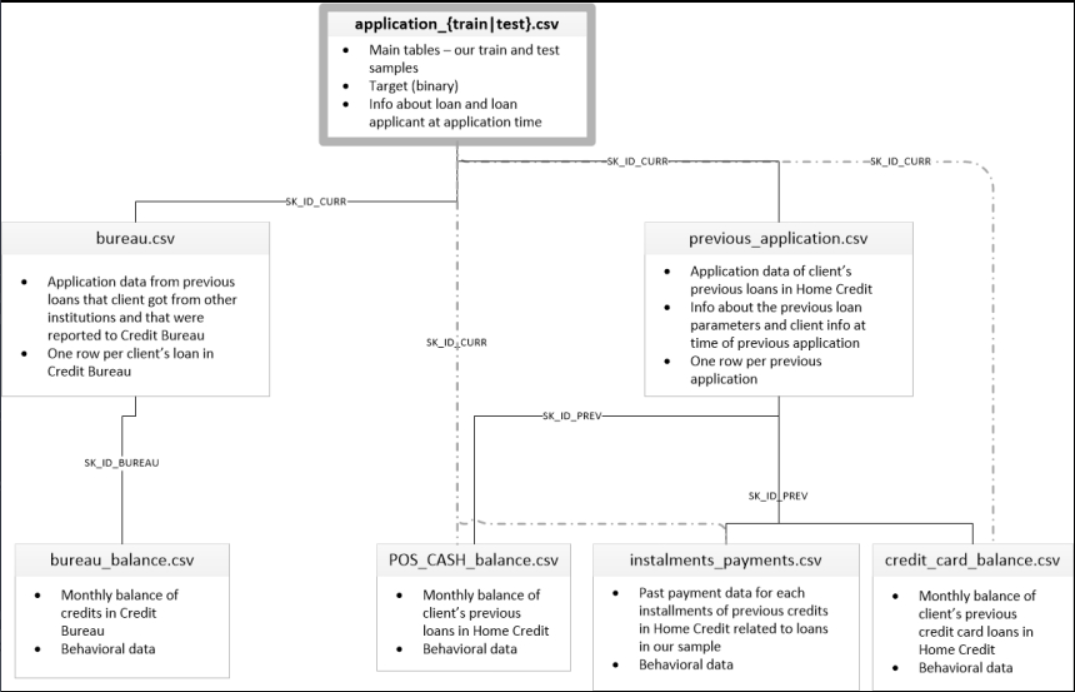

## Feature Engineering and transformers
Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. It consists of mainly 2 categories  which is feature creation, Creating new features from existing data and feature selection, picking the most significant features from the overall data and performing actions on that features. We used various techniques to create and pick features.
We grouped the data using various key and compared the results. We performed correlation analysis on the data(section 4.4). From those results, we picked the highly correlated features to do our analysis.

We selected both categorical and numerical data as our features. These data provide various insights which help our model to make a collective decision. Total income, credit amount, employment details and history, age are some of the examples of the numerical data.numerical data gives us quantitative analysis on the dataset. gender, Real estates owned, Cars owned, type of contract, employment details, and Educational details are some of the examples of the categorical data. Categorical data gives us qualitative analysis on the dataset.

Selected features = ['Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term', 'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE', 'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference', 'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY',   'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean', 'CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments', 'CC_Average_percentage_pass_due']

As we can see, In selected features we are analyzing the general info such as Previous loans approved or cancelled, annuity information, Monthly balance and expenditure, Credit card limit, remaining repays, Debt records, Number of active loans and their types, information about installments.



numerical_attributes = ['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term', 'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE',  'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference', 'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean','CC_Average_Monthly_Balance', 'CC_Average_Credit_Card_Limit','CC_Average_Monthly_Payments','CC_Average_percentage_pass_due'] 

As we can see, in numerical attributes, we are analyzing  various numerical data such as credit card limit, Annuity informations, Monthly payment and balance, debt information, information about installments,age, debt information.

categorical_attributes=['CODE_GENDER','FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

As we can see, In categorical attributes we are analyzing  various categorical data like  employment details, and Educational details, gender, Real estates owned, Cars owned, type of contract.

## Hyperparameter Tuning
In this phase, we utilized GridSearchCV for hyperparameter tuning and used the Hyperopt package's Bayesian method to tune the LightGBM model. 

Hyperparameters can’t be learned from the data. They are sometimes arguments we pass to the estimator functions. Some examples are alpha for lasso, gamma for SVM etc.

There are multiple parameters that can’t be inferred from the data in a model. These parameters decide the overall accuracy and efficiency of the model. So, these parameters play  crucial role  in the project and must be handled carefully.

Grid Search: Grid Search takes the hyper parameters provided for that model and iterates through the each combination of these parameters, build a model with each combination of the hyper parameters. Depending upon the type of model, some parameters are required. Grid search can be applied to any model in the machine learning domain , it is not limited to single model.Gris search gives best hyperparameters for any given model. Grid search do require a lot of computational power and it runs for a lot of time. But this is required in order for the machine learning to get high efficiency. 

GridsearchCv: GridSearchCV is function made available by the sklearn’s model-selection package. It runs through the all the combinations of hyperparameters provided and calculate the score for each combination. After this, It will split out best parameters from the lists of parameters we provided.

Bayesian Hyperparameter Optimization, in opposition to grid search, keep track of past results and build a probability model and use it to select the most optimal hyper parameters for the particular model.

Hyperopt is a python library which is used for optimizing search space. It offers three algorithms which are Random Search, Adaptive TPE and Tree of Parzen Estimators (TPE) which uses bayesian approach. Only difference is it uses p(x/y) instead of p(y/x).

## Work flow
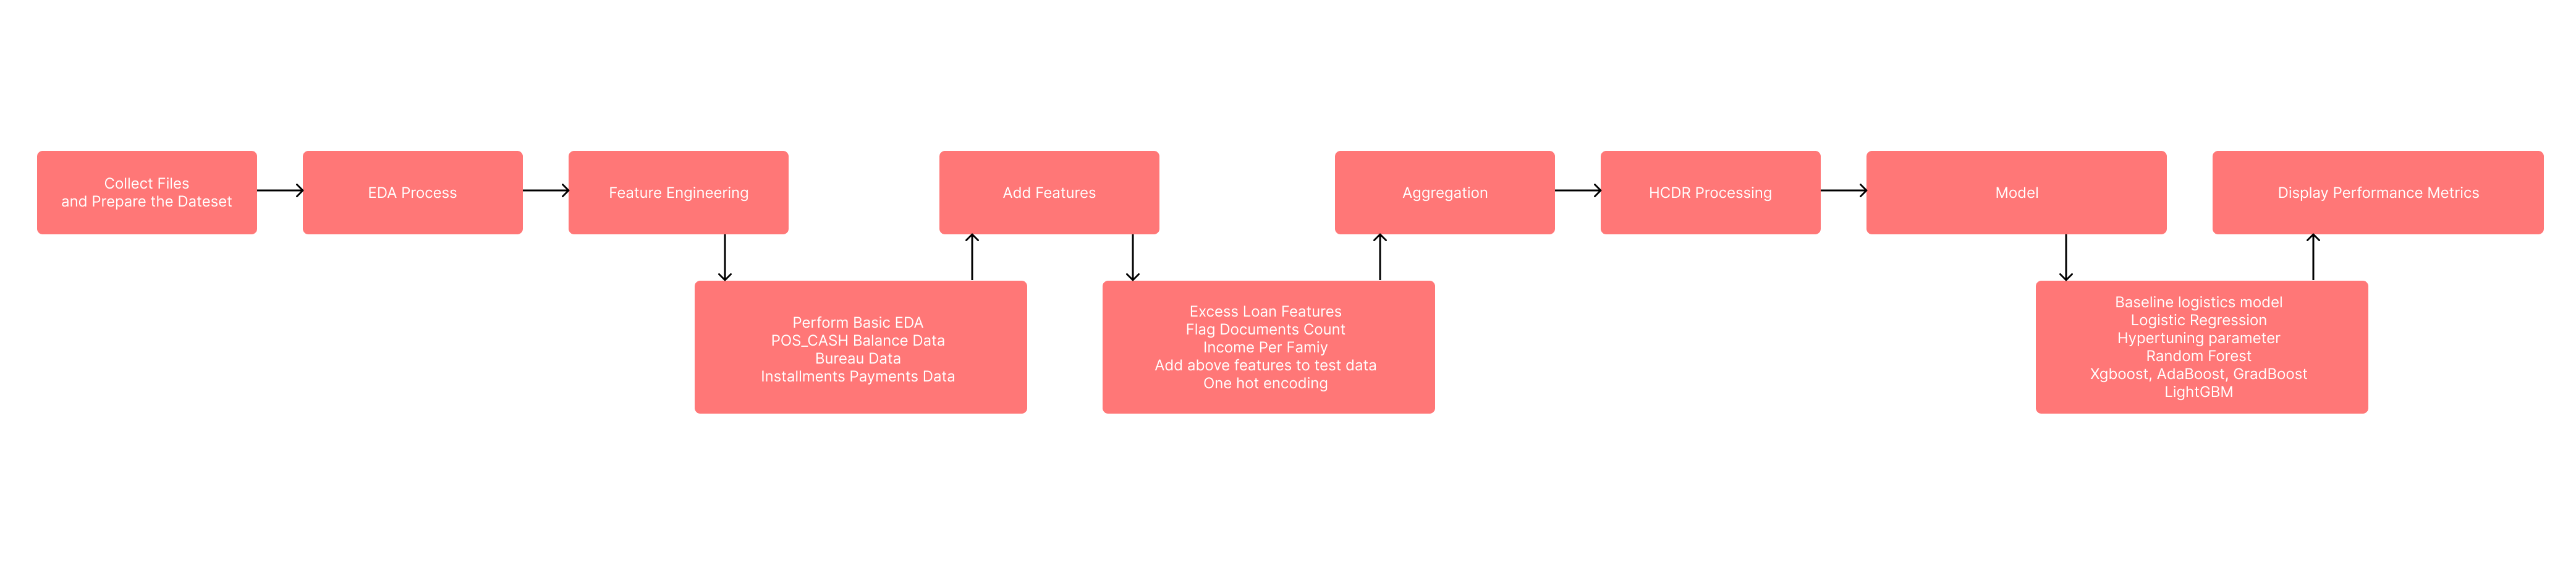

## Pipelines

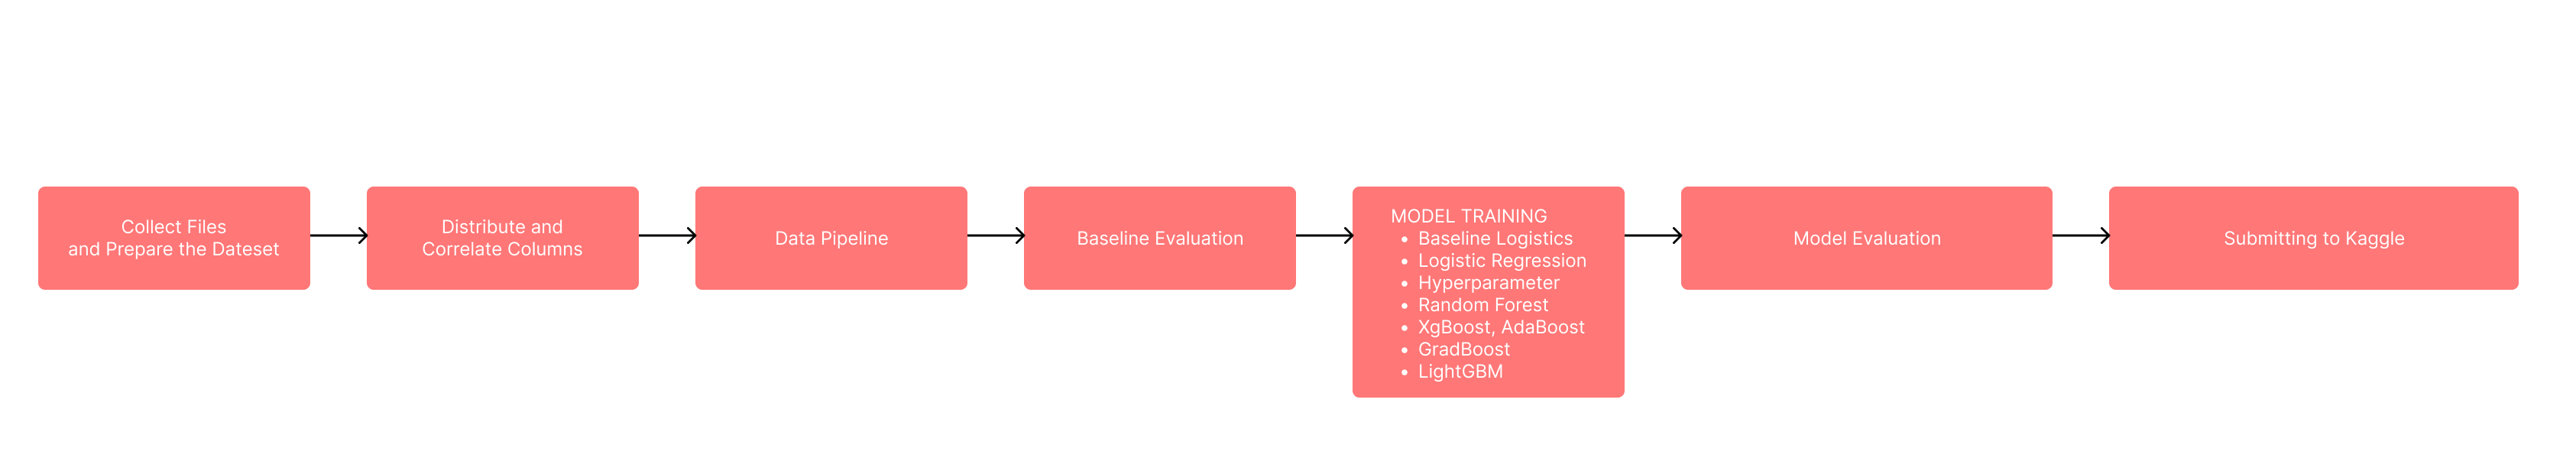

Numerical Pipeline:
- Get numerical features that should be considered.
- Building the pipeline for those features
- Use DataFrameSelector()
- Use SimpleImputer() for missing data. Those are imputed using mean.
- Use StandardScaler() to standardize the data

The numerical pipeline will look like as follows:
    numerical_pipeline = Pipeline([
     ('selector', DataFrameSelector(num_attribs)),
     ('imputer', SimpleImputer(strategy="median")),
     ('std_scaler', StandardScaler()),
     ])
     
Categorical Pipeline:
- Get categorical features that should be considered.
- Get the range of expected values
- Building the pipeline for those features
- Use SimpleImputer() for missing data. Those are imputed using constant values.
- One hot encoding

The numerical pipeline will look like as follows:
    categorical_pipeline = Pipeline([
     ('selector', DataFrameSelector(cat_attribs)),
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
     ])
     
Combining numerical pipeline and categorical pipeline:

data_prep_pipeline = FeatureUnion(transformer_list=[
 ("numerical_pipeline", numerical_pipeline),
 ("categorical_pipeline", categorical_pipeline),
 ])
prepared_pipeline = Pipeline([("preparation", data_prep_pipeline)])

### MODEL PIPELINES:

Baseline Logistic Model: Here were using logistic regression that uses a logistic function

            prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])
   
Logistic Regression with Additional Features:
            
            numerical_pipeline = Pipeline([
        ('selector', DataFrameSelector(numerical_attributes)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

    categorical_attributes = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

    categorical_pipeline = Pipeline([
            ('selector', DataFrameSelector(categorical_attributes)),
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
        ])
   
GridsearchCV with Hyperparameter Tuning:

      prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

    param_grid = {'linear__penalty':['l1','l2', 'elasticnet'], 
                  'linear__C': [1, 10, 100, 1000, 10000]
                 }
   
Random Forest:
            
            prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("random_forest", RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, random_state=42))
    ])

XGBoost:

            prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("xgboost", xgb.XGBClassifier())
    ])
   
ADABoost:
            
            prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("AdaBoost", AdaBoostClassifier())
    ])

GradBoost:
            
            prepared_pipeline = Pipeline([
        ("preparation", data_prep_pipeline),
        ("GradBoost", GradientBoostingClassifier())
    ])
    
LightGBM:
            
            param_grid = {
    'n_estimators': 1000, 'learning_rate': 0.1, 'n_jobs': -1
    }

    prepared_pipeline = Pipeline([
            ("preparation", data_prep_pipeline),
            ('mdl',  lg.LGBMClassifier(**param_grid))
        ])

Neural Network:
            
    params_grid = {'n_estimators': 600, 'learning_rate': 0.1, 'n_jobs': -1}


    network = KerasClassifier(
                build_fn = get_model,
                epochs = 30,
                batch_size = 10,
                verbose = 0,)

    prepared_pipeline = Pipeline([
            ("preparation", data_prep_pipeline),
            ('S_features', SelectFromModel(lg.LGBMClassifier(**params_grid), prefit=False, threshold="median")),
            ('network', network)
        ])


## Experimental results
XGBoost and LighGBM are better performing models from our experiments so far.
    - XGBoost with 65 additional features, achieved test accuracy 0.7641 AUC.
    - LightGBM with 65 additional features, achieved test accuracy 0.7677 AUC.
    - The train time consumed is much larger for RandomForestCV, the least is Baseline_Logistic, which is trained with 26 features.
    
 
    
![image.png]( 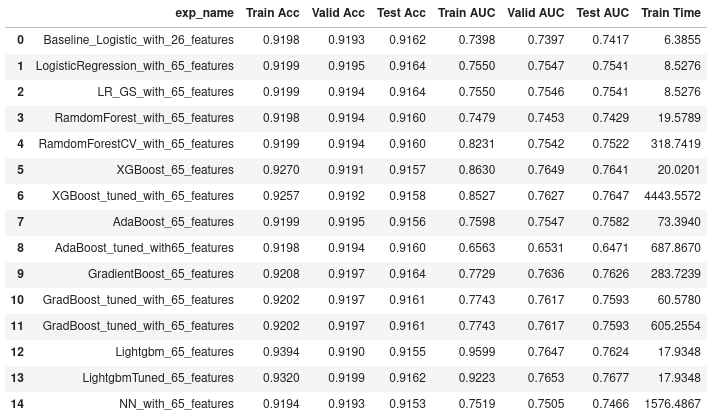)

## Discussion
We have experimented the following 7 models:
        Baseline Logistic Regression with 27 features
        Logistic Regression with additional features
        Logistic Regression with GridSearchCV
        Random Forest with additional features
        Random Forest with RandomSearchCV
        XGBoost with additional features
        GradBoost with additional features
        LightGBM with additional features
        LightGBM with Hperparameter tuning
        Neural Network Model

From our experiments, our best model is LightGBM with Hyperparameter Tuning. Highest Kaggle scores for it, 0.74927 on private board and 0.74957 on public board. While experimenting, our models did take time to run when we used GridSearch CV or RandomSearchCV techniques.
We have used Bayesian HyperParameter optimization for tuning LightGBM model and we have observed a better performance in terms of total execution time.
Also observed that XGBoost and LightGBM models have the similar AUC scores of 0.7641 and 0.7677 respectively.

## Conclusion
- In this phase our main focus was to implement a neural network, test and compare it with other models.
- Test accuracy for our neural network model is 0.74 AUC, on the other hand LightGBM's score is 0.76. 
- Neural network took a lot more time to train than the LightGBM model as shown in the experimental results table.
- All in all, LightGBM tuned model is the best so far in our experimentation with best accuracy and least train time.
- For future scope we would like to tune neural netork parameters to get a better accuracy with some additional feature engineering to get better scores.

## Kaggle Submission
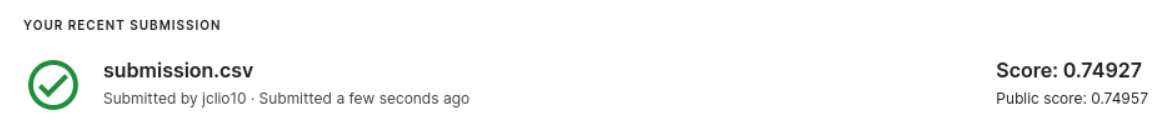